# Parcial 1
### Daniel Bolivar - 09-30-2023

# EDA Fraud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import joblib

# ETL
Extract Transform and Loading

In [3]:
# Cargar los DataFrames desde los enlaces
transaction = pd.read_csv ('train_transaction.csv')

identity = pd.read_csv ('train_identity.csv')

In [4]:
d0 = pd.merge(transaction, identity, on= 'TransactionID', how= 'left')

In [5]:
d0.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 434 columns]

In [6]:
d0.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          id_17         id_18  \
count  524834.000000  524834.000000  ...  139369.000000  45113.000000   
mean      290.733794      86.800630  ...     189.451377     14.237337   
std       101.741072       2.690623  ...      30.375360      1.561302   
min       100.000000      10.000000  ...     100.000000     10.000000   
25%       204.000000      87.000000  ...     166.000000     13.000000   
50%       299.000000      87.000000  ...     166.000000     15.000000   
75%       330.000000      87.000000  ...     225.000000     15.000000   
max       540.000000     102.000000  ...     229.000000     29.000000   

               id_19          id_20        id_21        id_22        id_24  \
count  139318.000000  139261.000000  5159.000000  5169.000000  4747.000000   
mean      353.128174     403.882666   368.269820    16.002708    12.800927   
std       141.095343     152.160327   198.847038     6.897665     2.372447   
min       100.000000     100.000000   100.000000    10.000000    11.000000   
25%       266.000000     256.000000   252.000000    14.000000    11.000000   
50%       341.000000     472.000000   252.000000    14.000000    11.000000   
75%       427.000000     533.000000   486.500000    14.000000    15.000000   
max       671.000000     661.000000   854.000000    44.000000    26.000000   

             id_25        id_26         id_32  
count  5132.000000  5163.000000  77586.000000  
mean    329.608924   149.070308     26.508597  
std      97.461089    32.101995      3.737502  
min     100.000000   100.000000      0.000000  
25%     321.000000   119.000000     24.000000  
50%     321.000000   149.000000     24.000000  
75%     371.000000   169.000000     32.000000  
max     548.000000   216.000000     32.000000  

[8 rows x 403 columns]

# Visualizacion

## Conociendo la Data


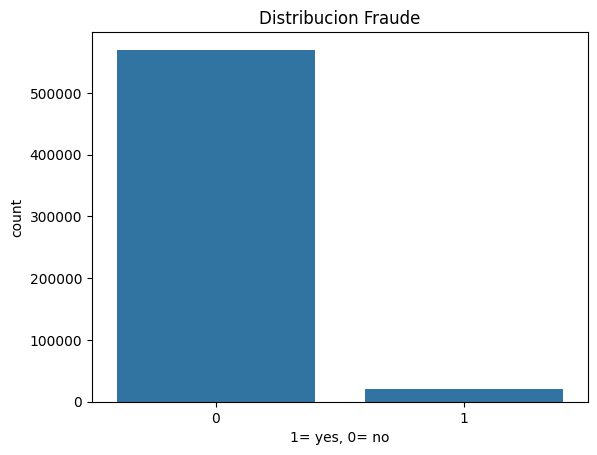

In [8]:
plt.title ('Distribucion Fraude')
sns.countplot(x=d0.isFraud)
plt.xlabel ('1= yes, 0= no')
plt.show()

#### Distribucion

Text(0, 0.5, 'Probabilidad')

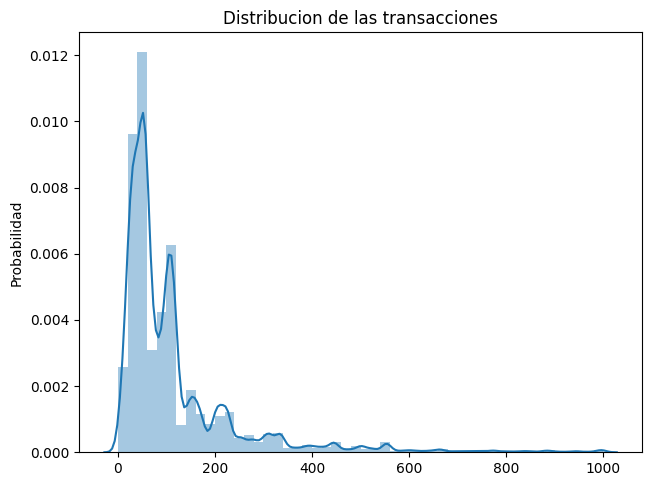

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(221)
g = sns.distplot(d0[d0['TransactionAmt']<= 1000]['TransactionAmt'])
g.set_title("Distribucion de las transacciones")
g.set_xlabel("")
g.set_ylabel("Probabilidad")

Se puede notar el sesgo negativo

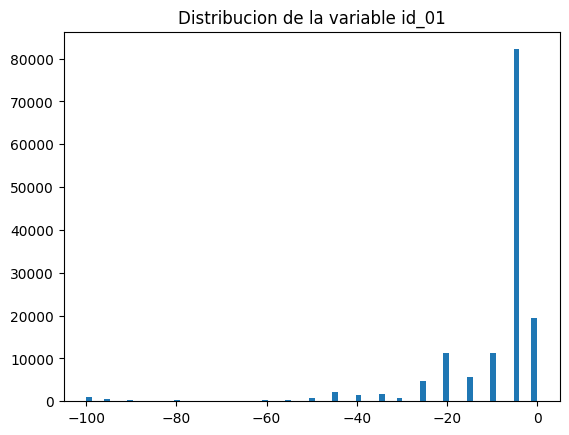

In [10]:
plt.hist(d0['id_01'], bins=77);
plt.title('Distribucion de la variable id_01');

In [11]:
d0.ProductCD.value_counts()

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

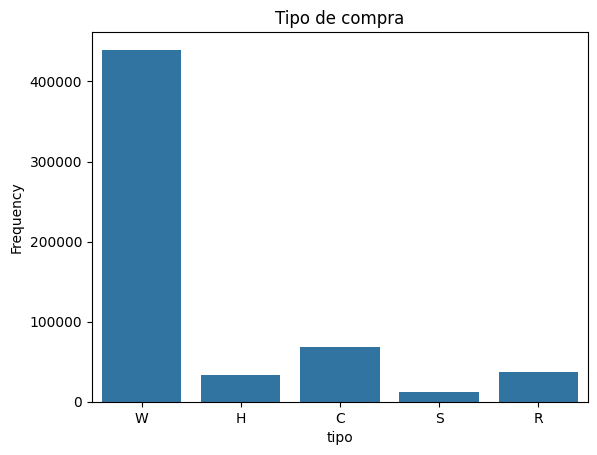

In [12]:
plt.title('Tipo de compra')
sns.countplot(x=d0.ProductCD)
plt.xlabel('tipo')
plt.ylabel('Frequency')
plt.show()

Column:  TransactionID
Skew: -0.0
Kurtosis:  -1.2


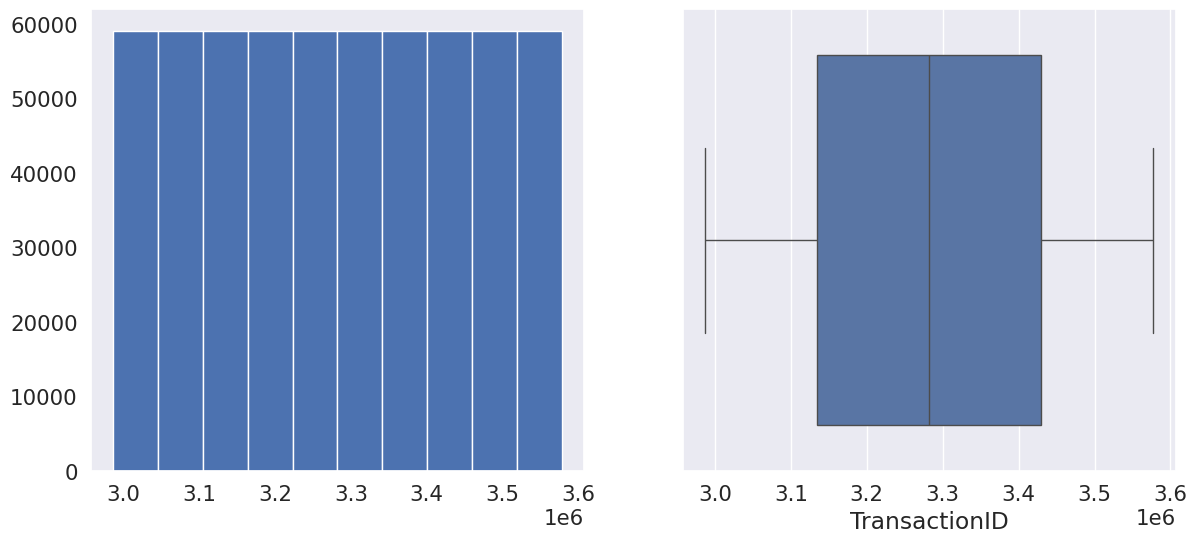

Column:  isFraud
Skew: 5.06
Kurtosis:  23.62


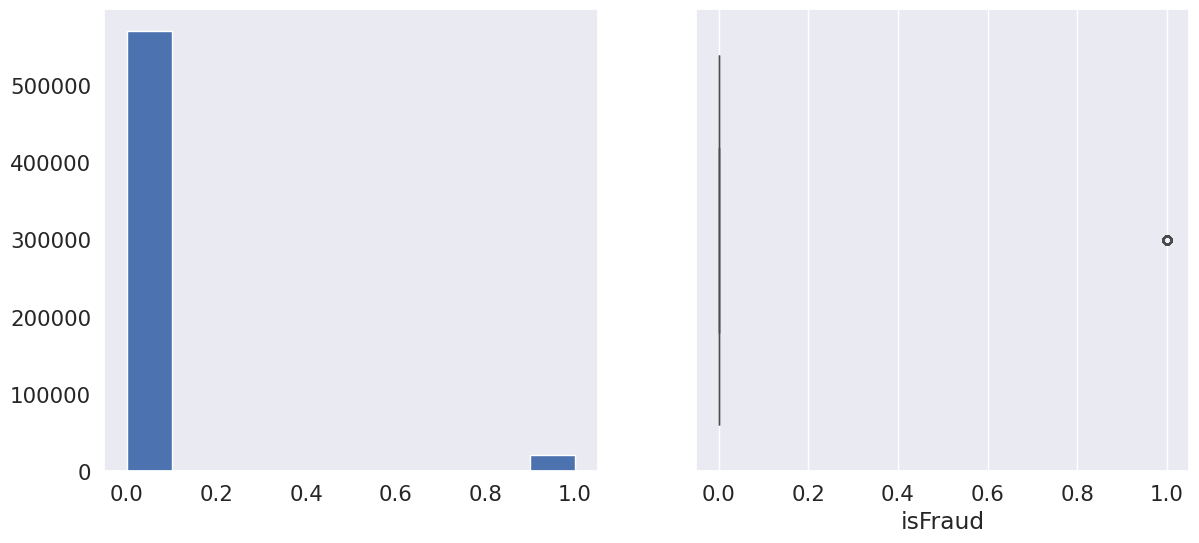

Column:  TransactionDT
Skew: 0.13
Kurtosis:  -1.23


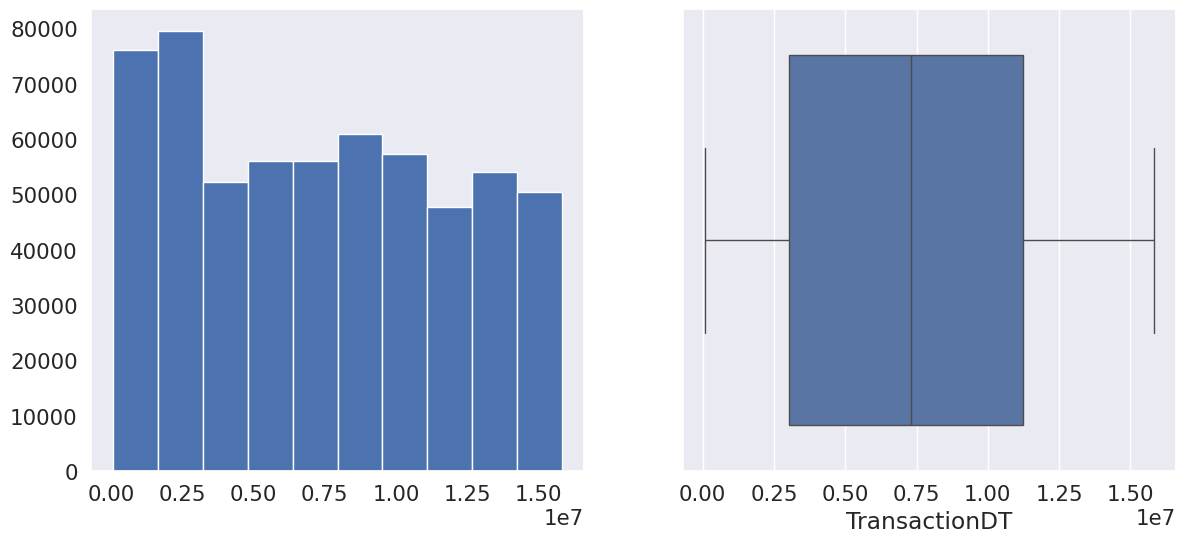

Column:  TransactionAmt
Skew: 14.37
Kurtosis:  1123.96


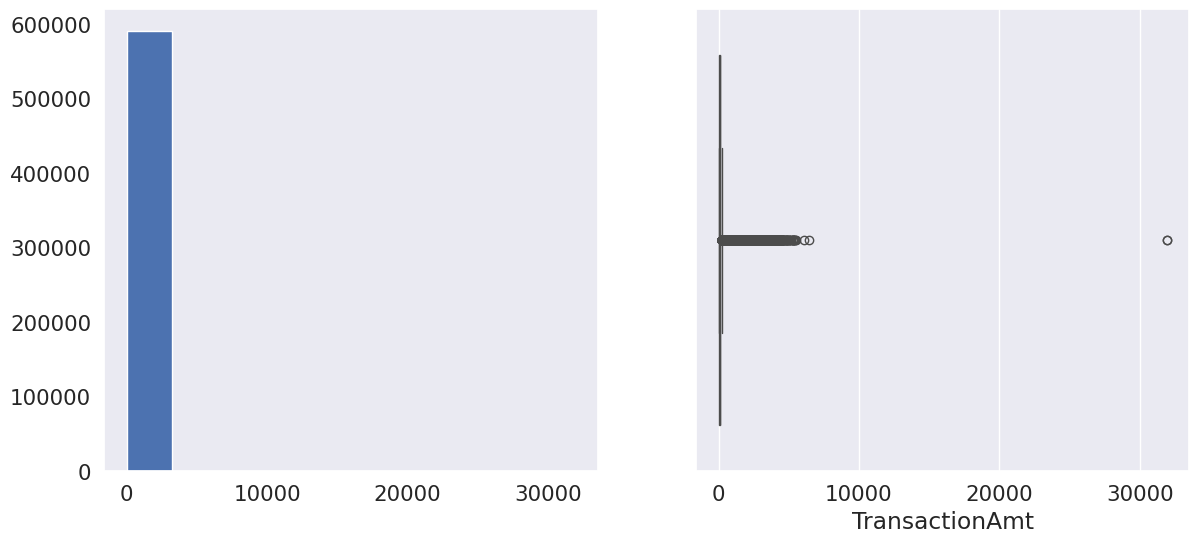

Column:  card1
Skew: -0.04
Kurtosis:  -1.14


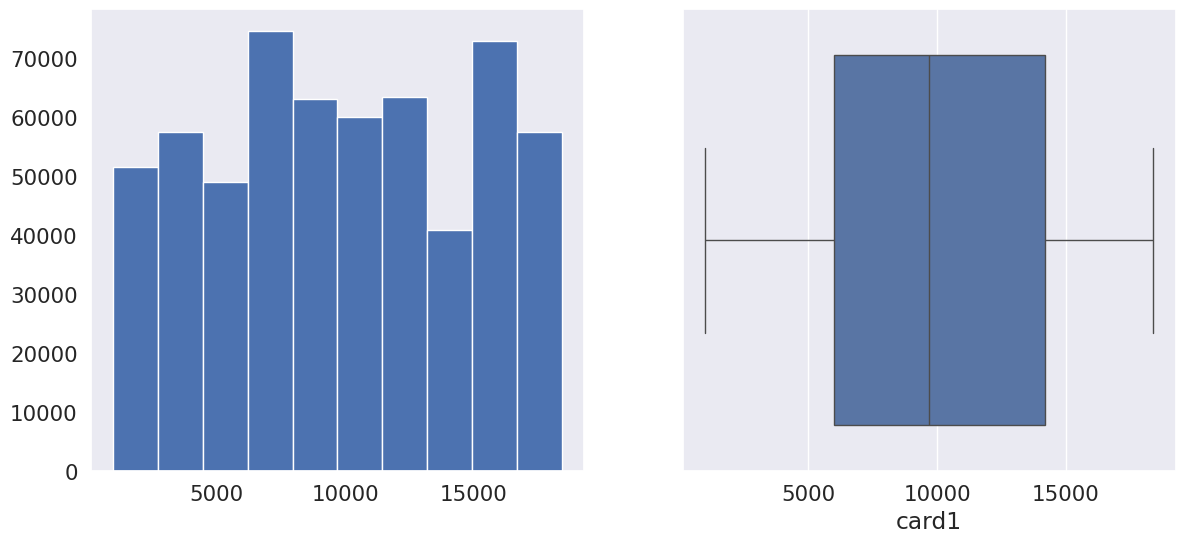

Column:  card2
Skew: -0.2
Kurtosis:  -1.33


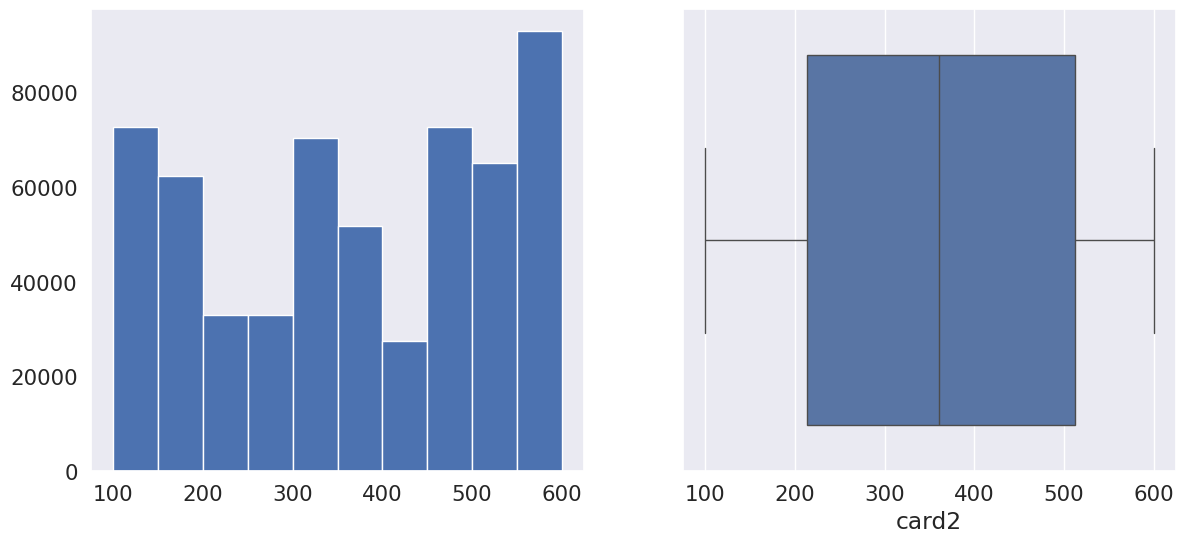

Column:  card3
Skew: 2.02
Kurtosis:  6.32


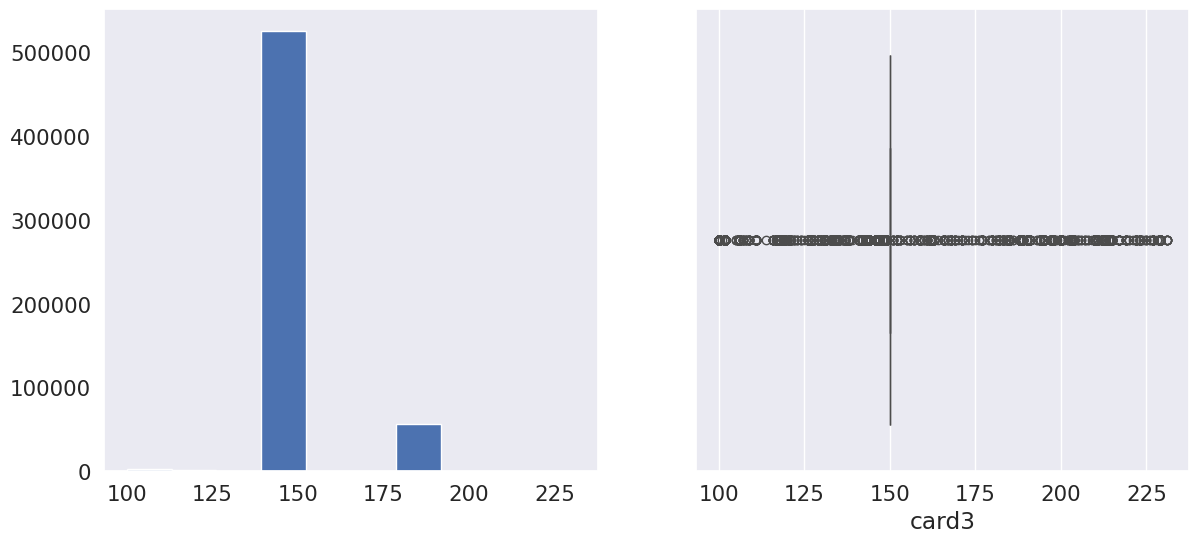

Column:  card5
Skew: -1.22
Kurtosis:  -0.05


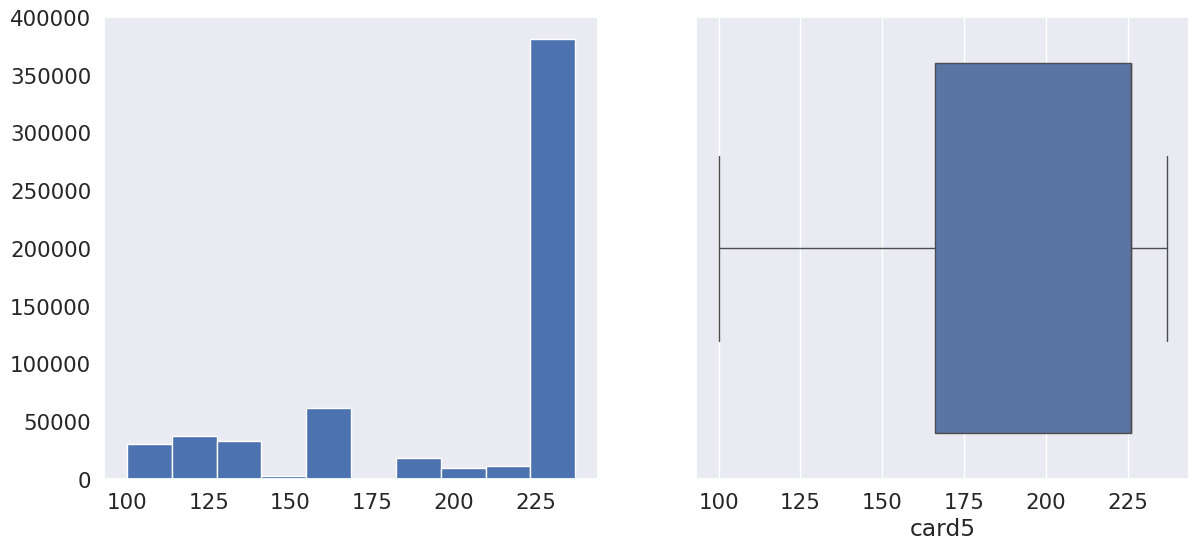

Column:  addr1
Skew: 0.37
Kurtosis:  -0.5


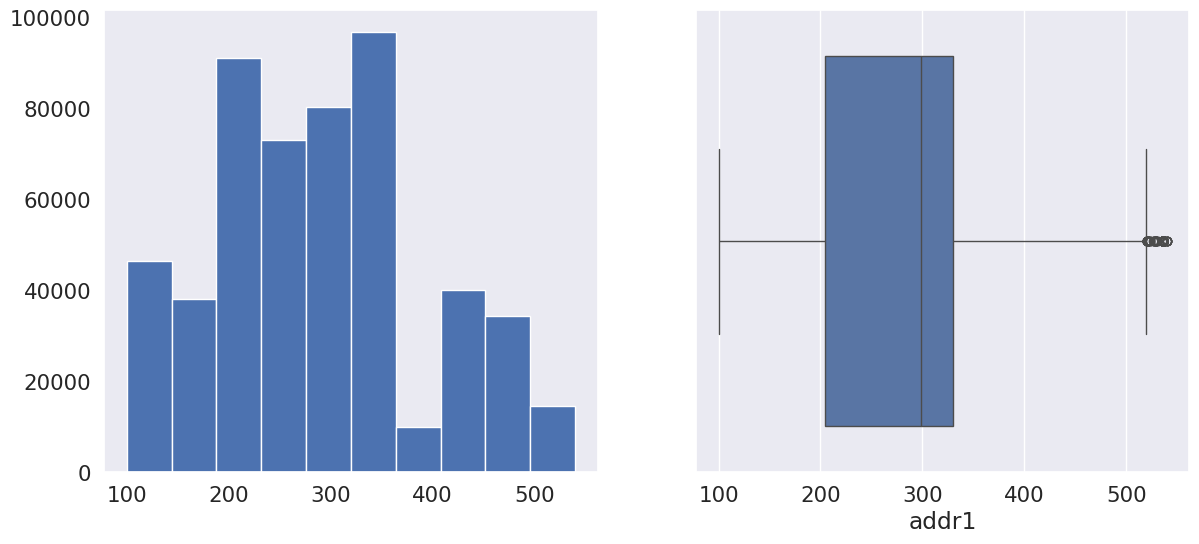

Column:  addr2
Skew: -14.5
Kurtosis:  256.78


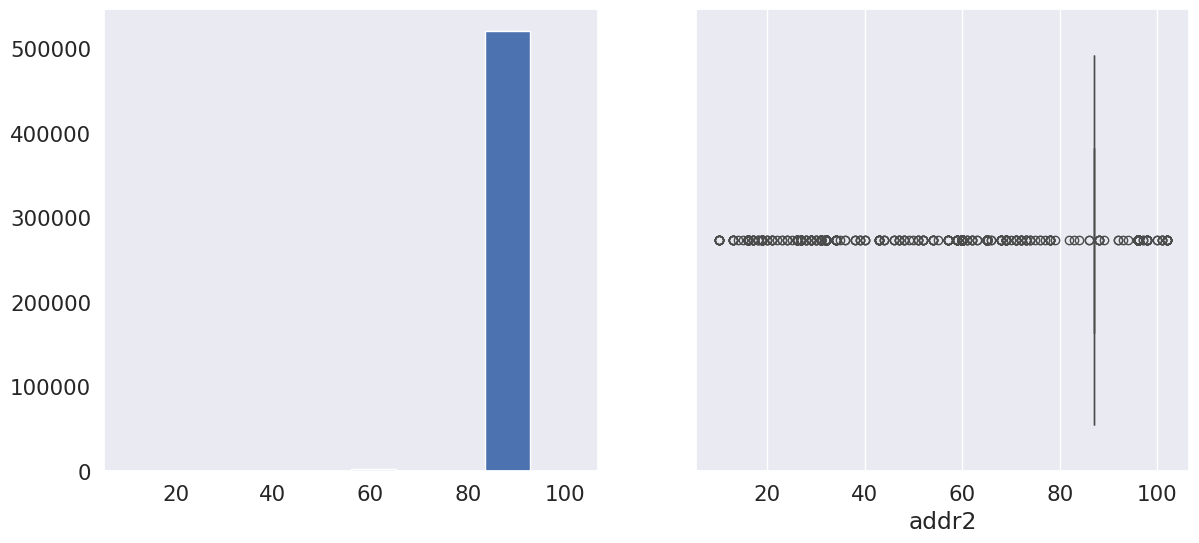

Column:  dist1
Skew: 5.11
Kurtosis:  36.8


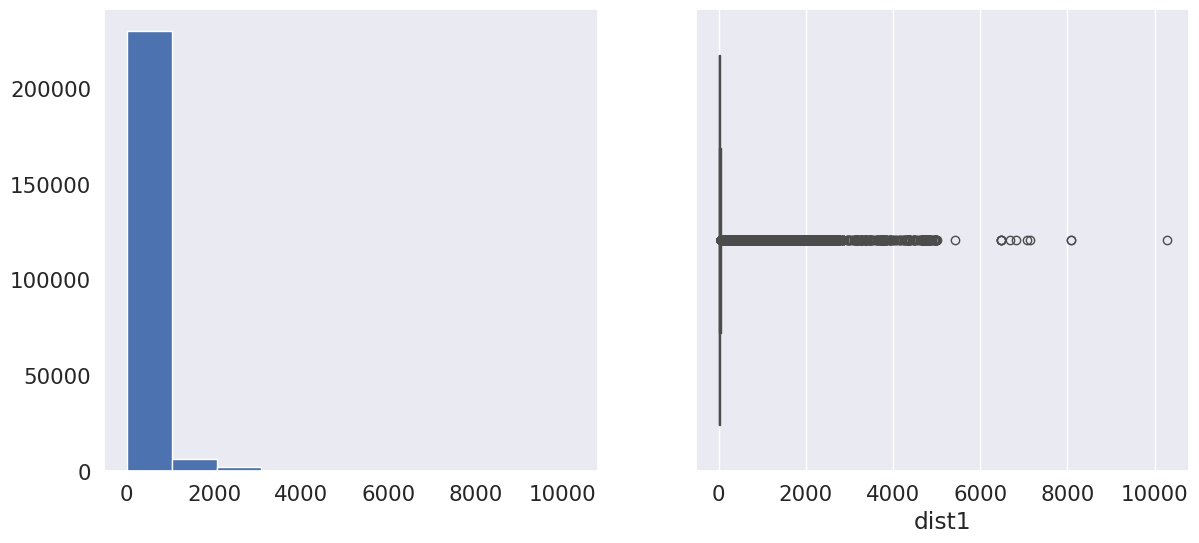

Column:  dist2
Skew: 5.97
Kurtosis:  58.68


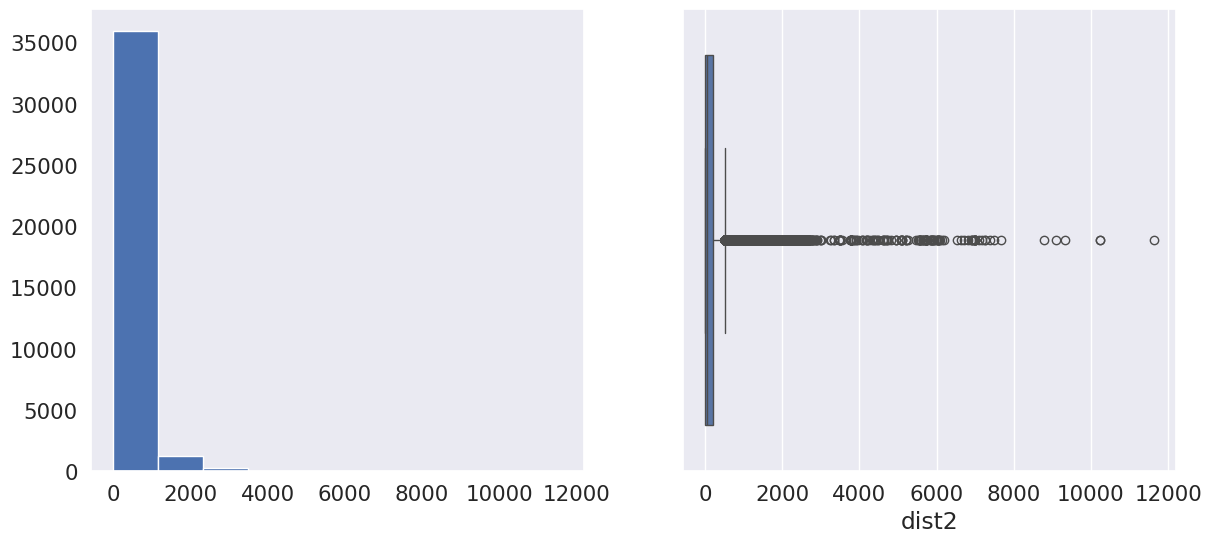

Column:  C1
Skew: 23.96
Kurtosis:  669.38


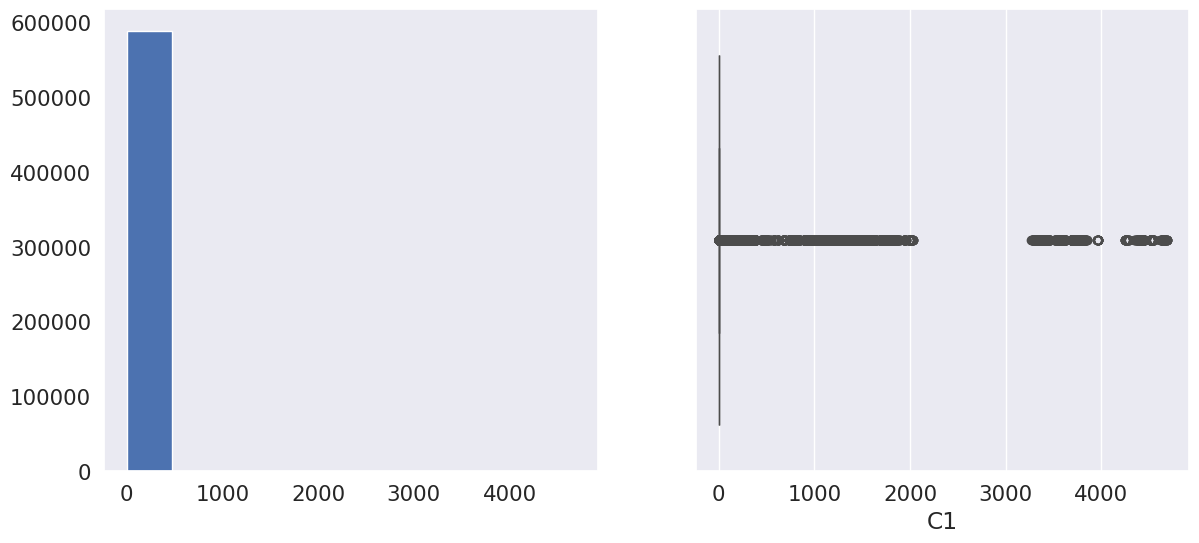

Column:  C2
Skew: 23.68
Kurtosis:  655.17


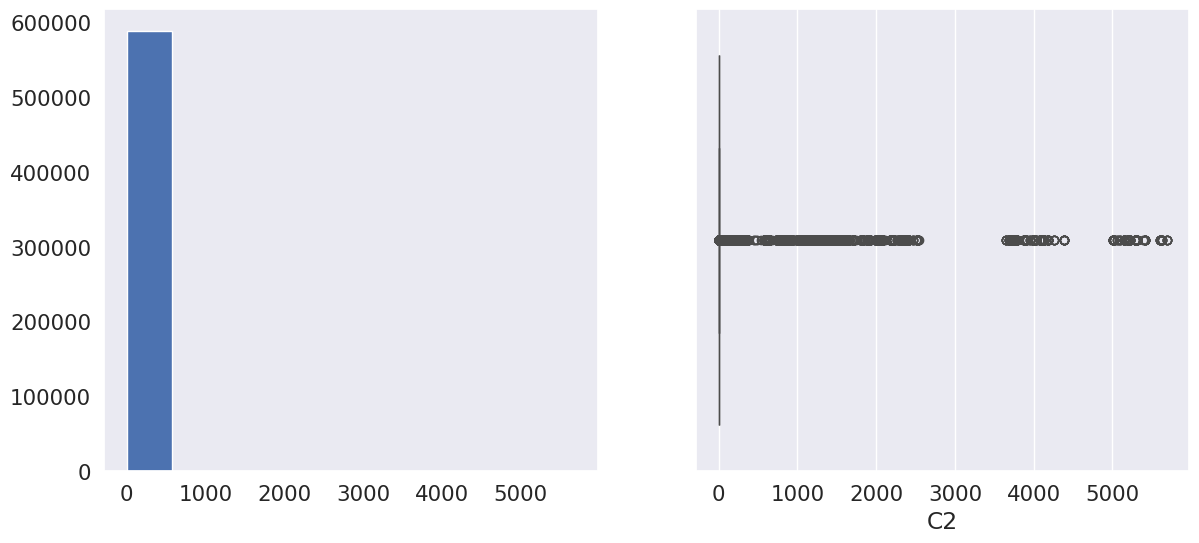

Column:  C3
Skew: 88.95
Kurtosis:  11000.44


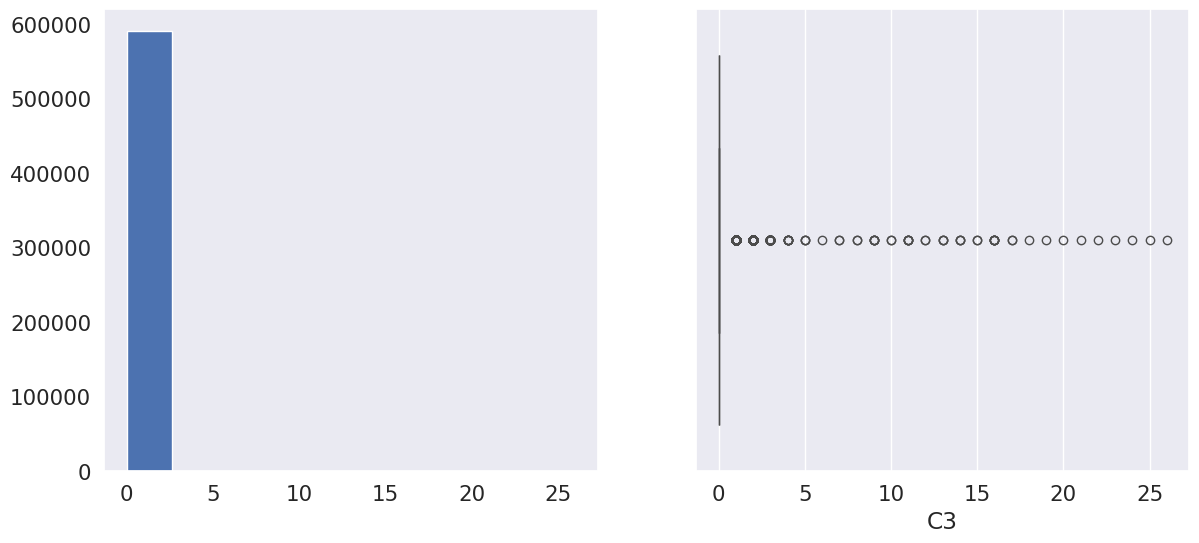

Column:  C4
Skew: 22.08
Kurtosis:  543.41


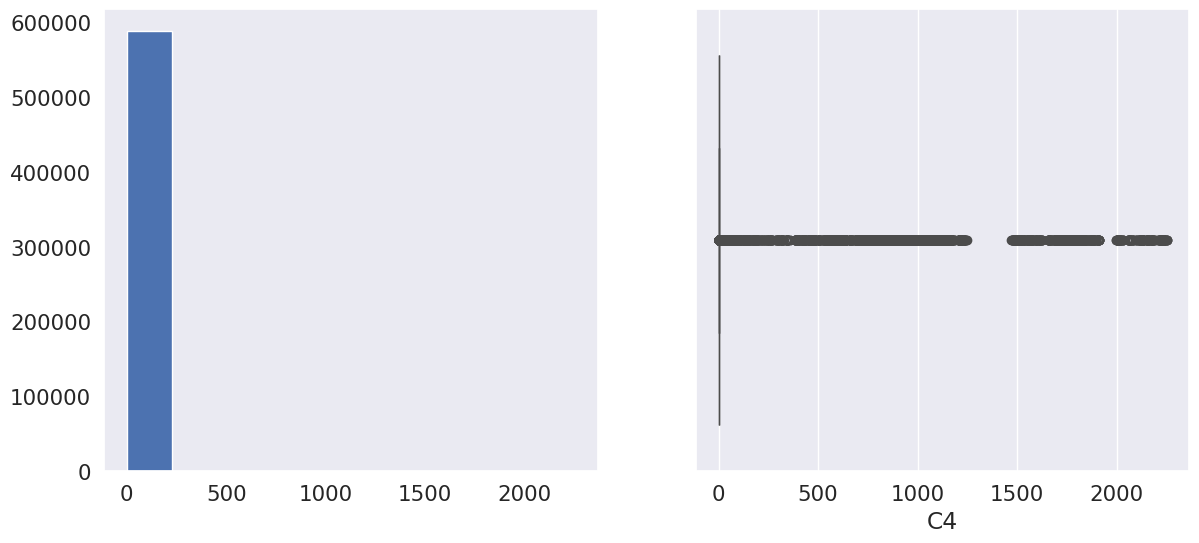

Column:  C5
Skew: 5.79
Kurtosis:  35.98


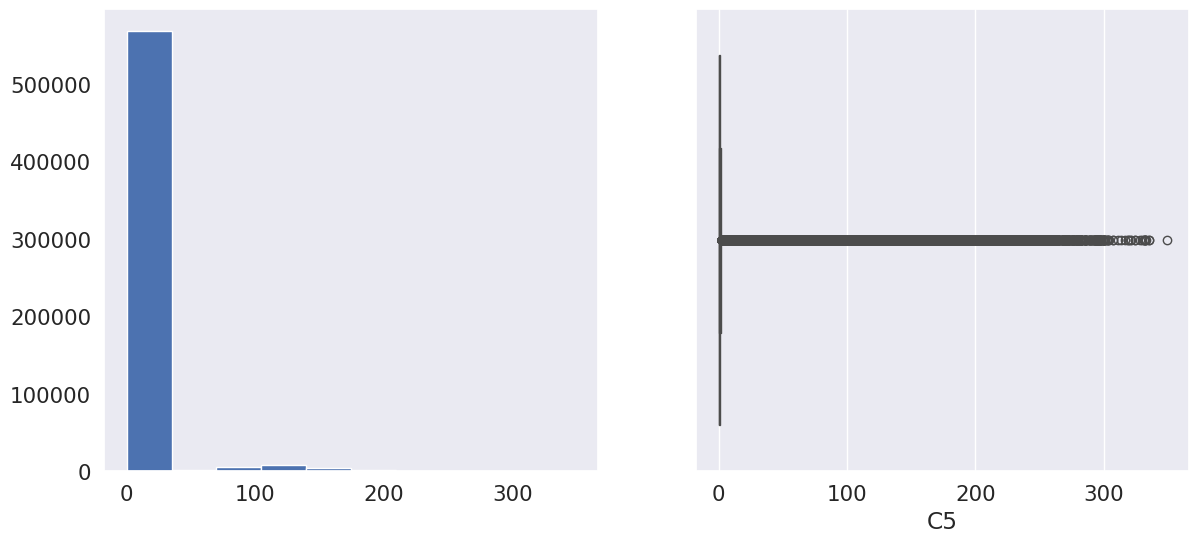

Column:  C6
Skew: 19.77
Kurtosis:  463.83


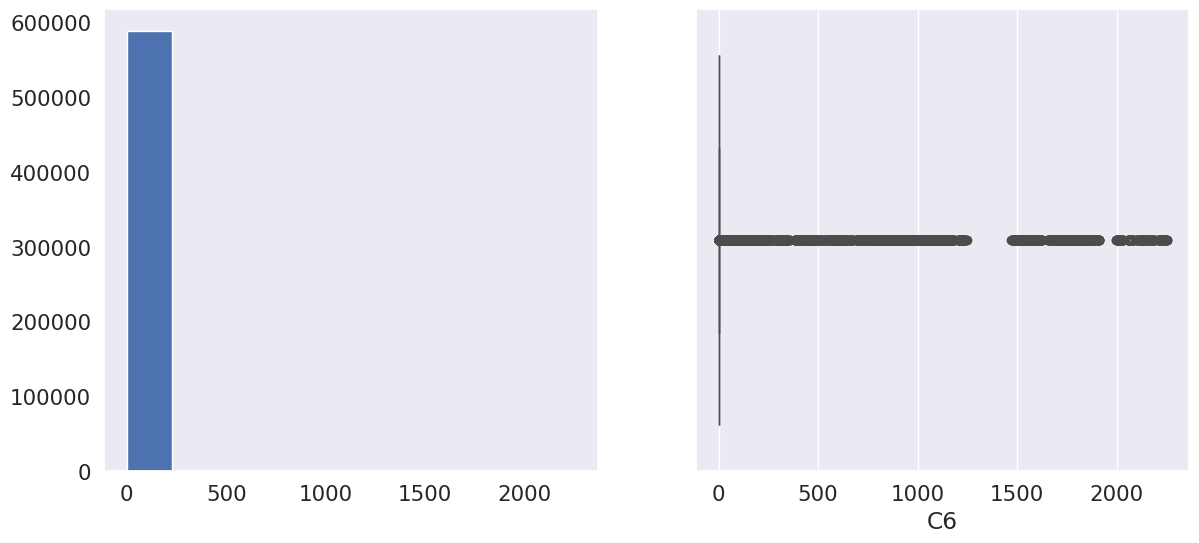

Column:  C7
Skew: 27.19
Kurtosis:  794.0


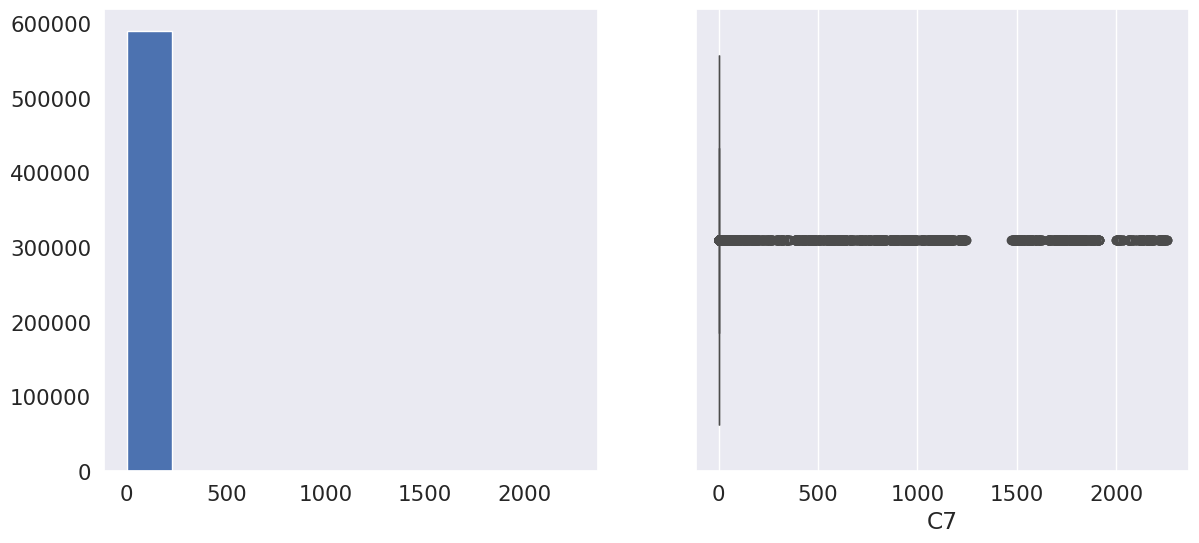

Column:  C8
Skew: 26.08
Kurtosis:  742.41


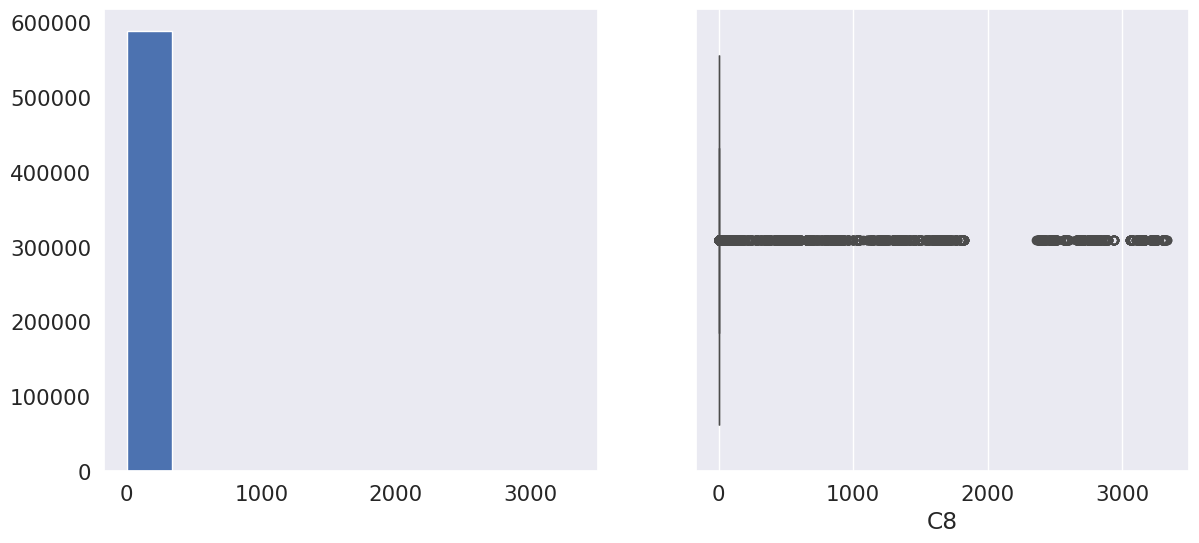

Column:  C9
Skew: 5.69
Kurtosis:  35.52


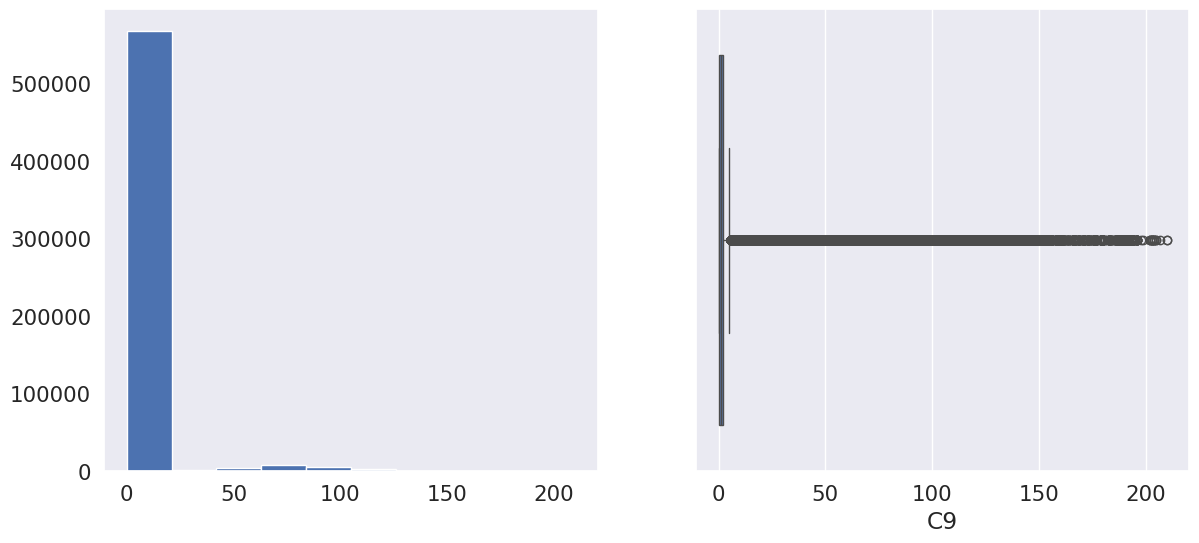

Column:  C10
Skew: 25.22
Kurtosis:  689.59


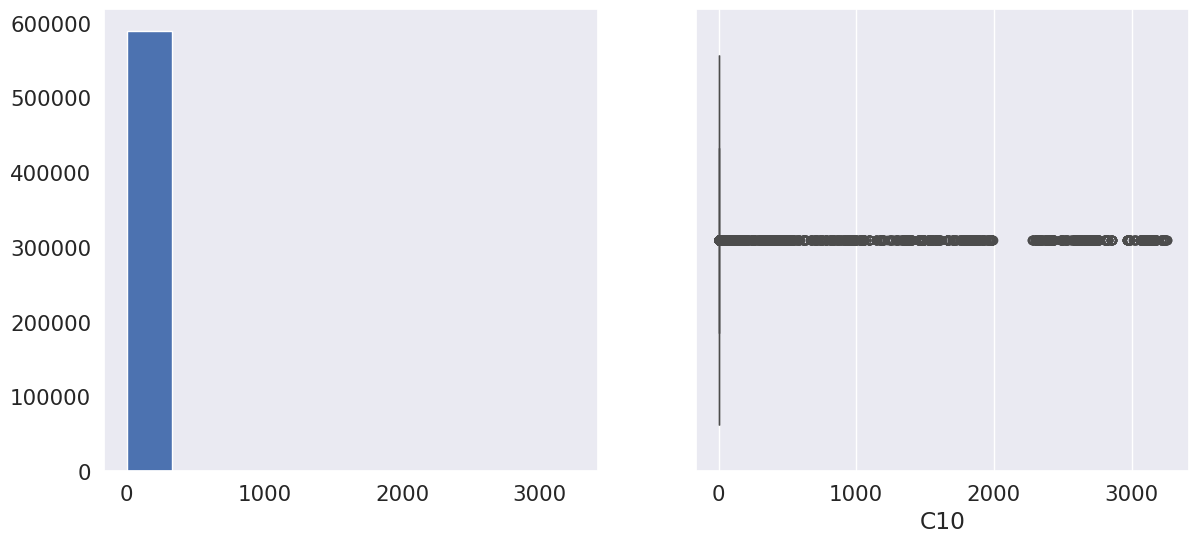

Column:  C11
Skew: 22.36
Kurtosis:  583.12


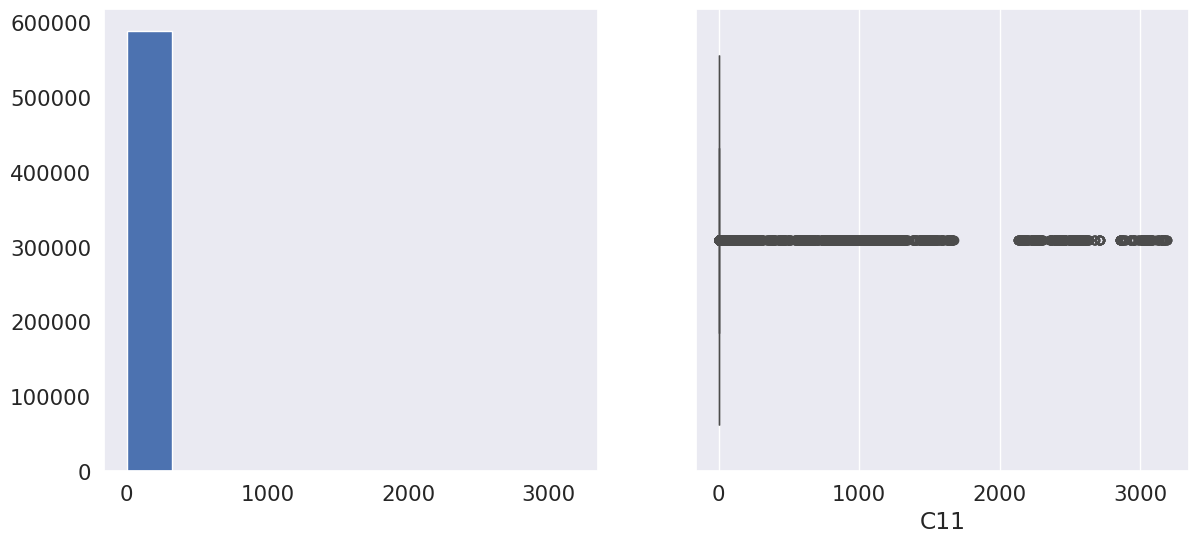

Column:  C12
Skew: 27.42
Kurtosis:  809.59


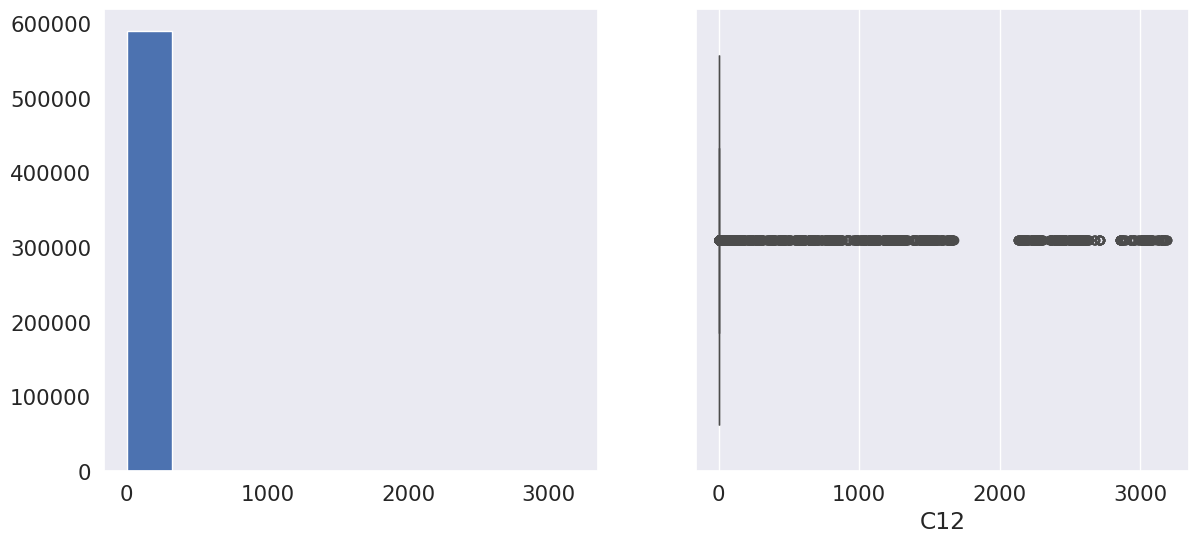

Column:  C13
Skew: 8.99
Kurtosis:  127.05


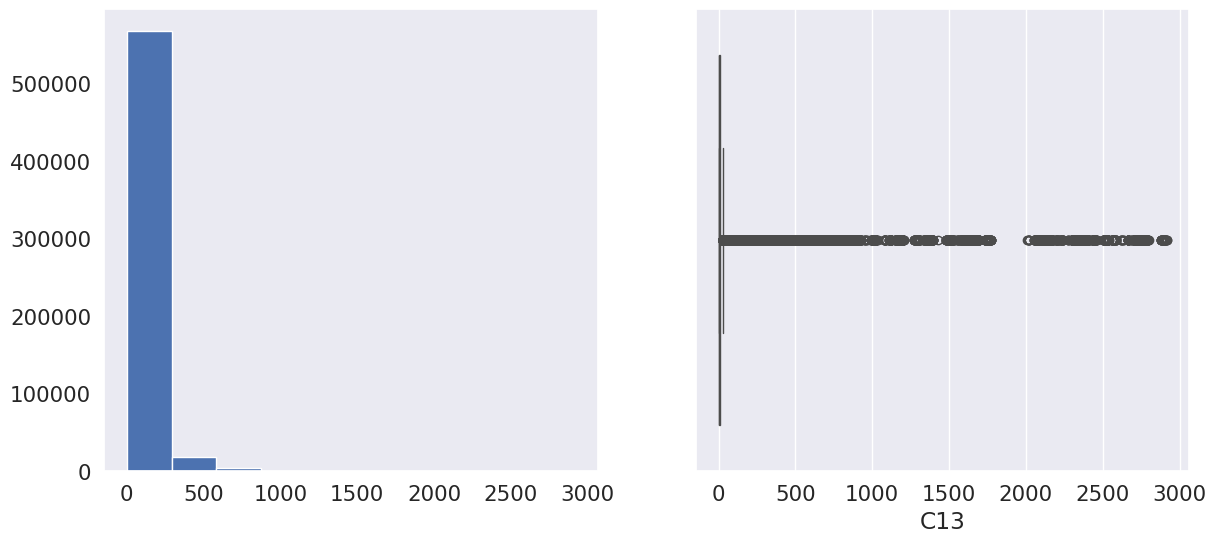

Column:  C14
Skew: 16.53
Kurtosis:  347.09


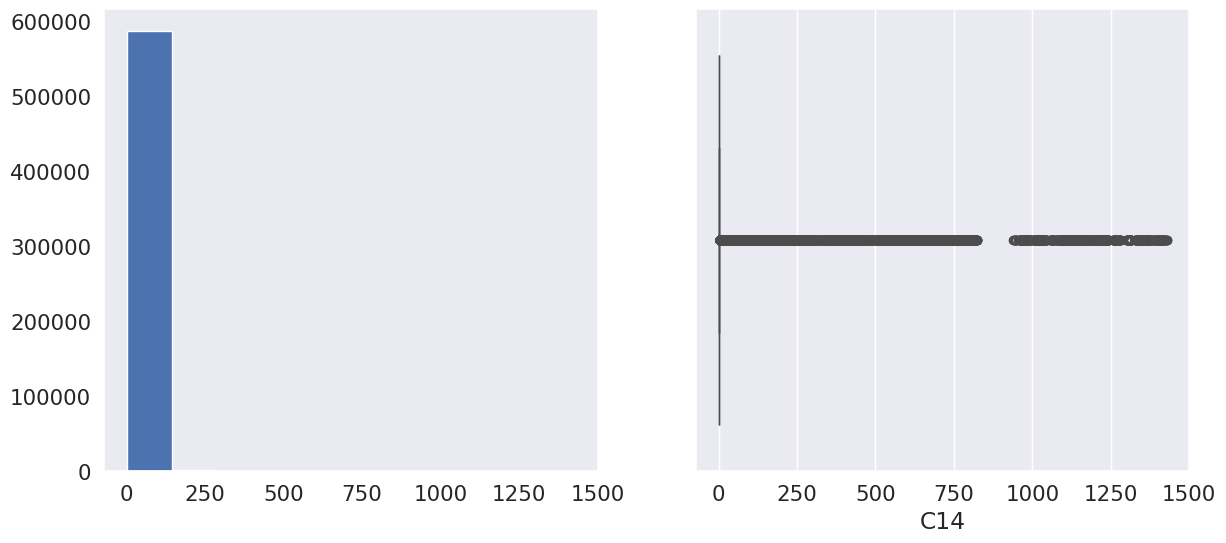

Column:  D1
Skew: 1.81
Kurtosis:  2.2


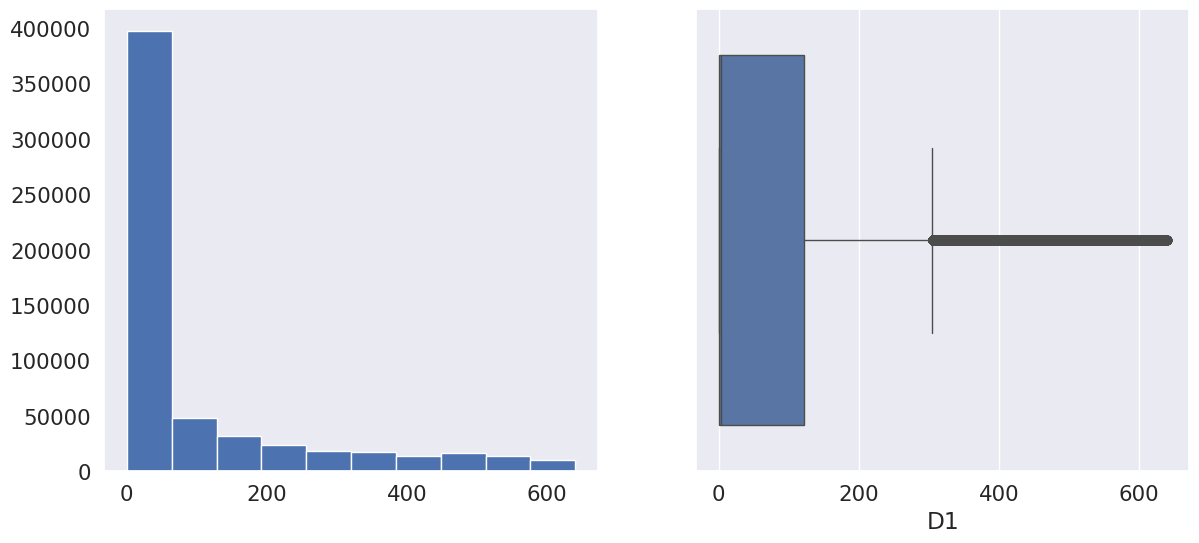

Column:  D2
Skew: 1.02
Kurtosis:  -0.17


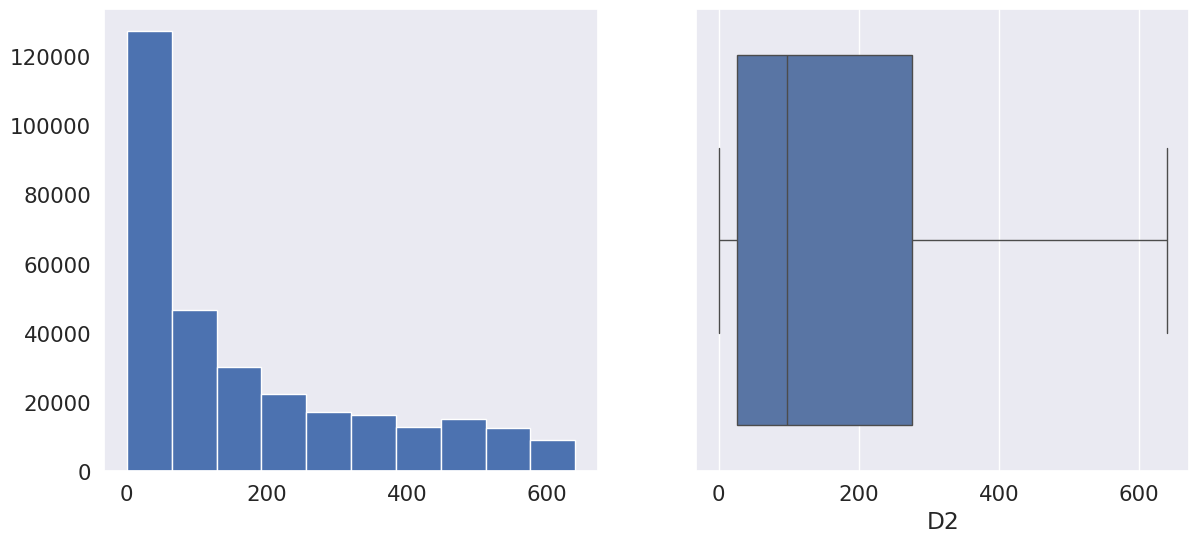

Column:  D3
Skew: 4.54
Kurtosis:  24.95


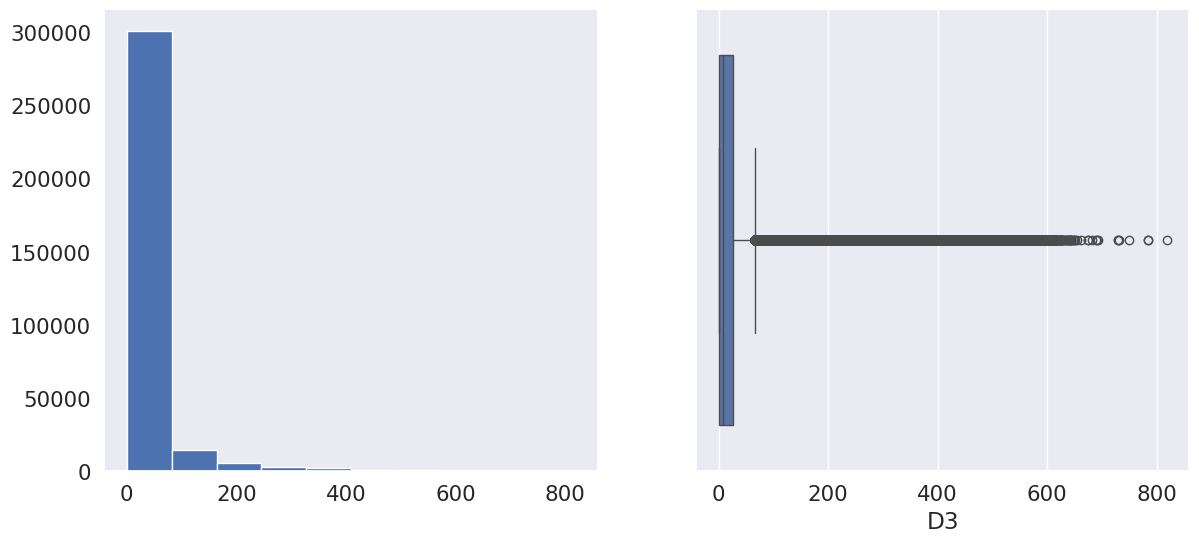

Column:  D4
Skew: 1.17
Kurtosis:  -0.03


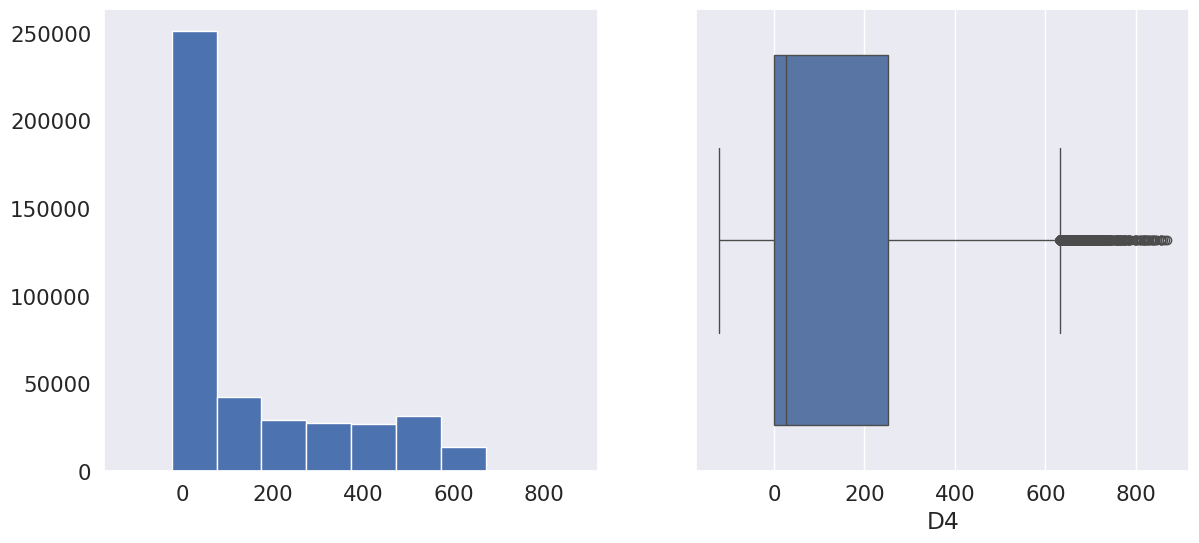

Column:  D5
Skew: 3.39
Kurtosis:  12.38


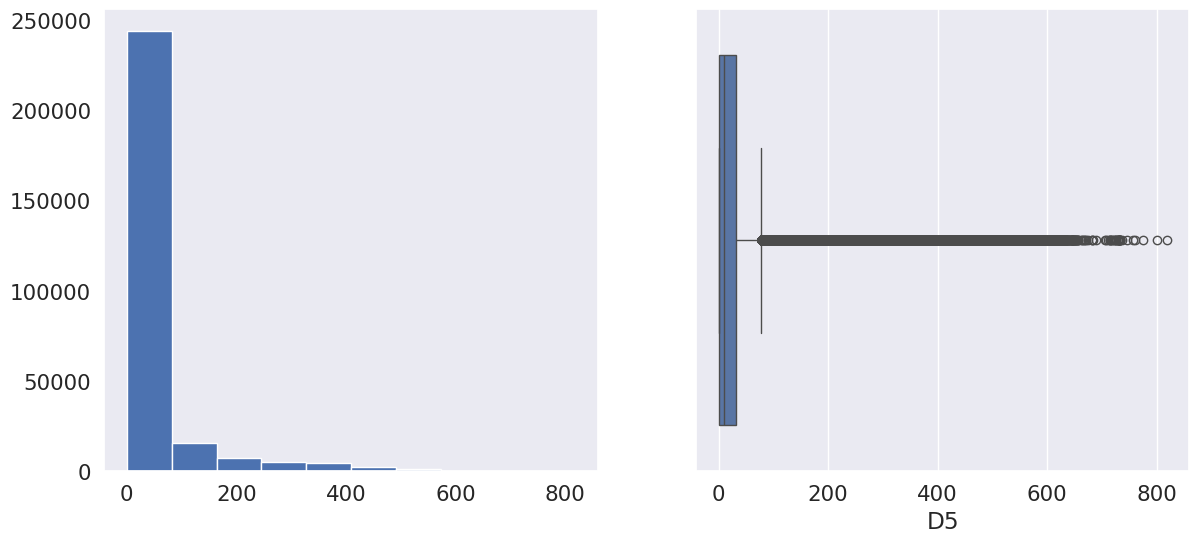

Column:  D6
Skew: 2.26
Kurtosis:  4.7


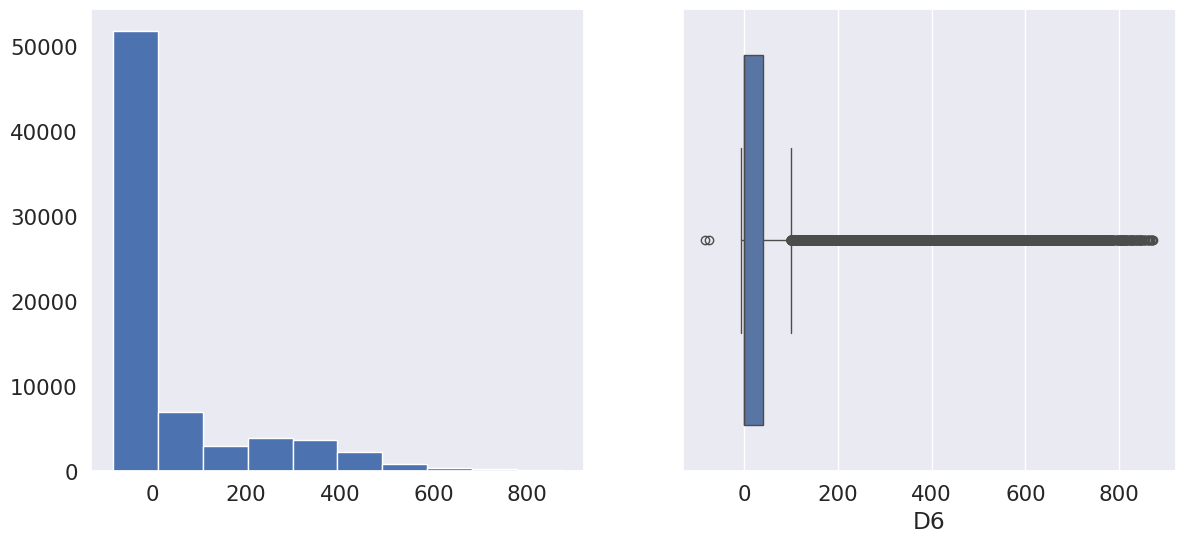

Column:  D7
Skew: 2.95
Kurtosis:  8.68


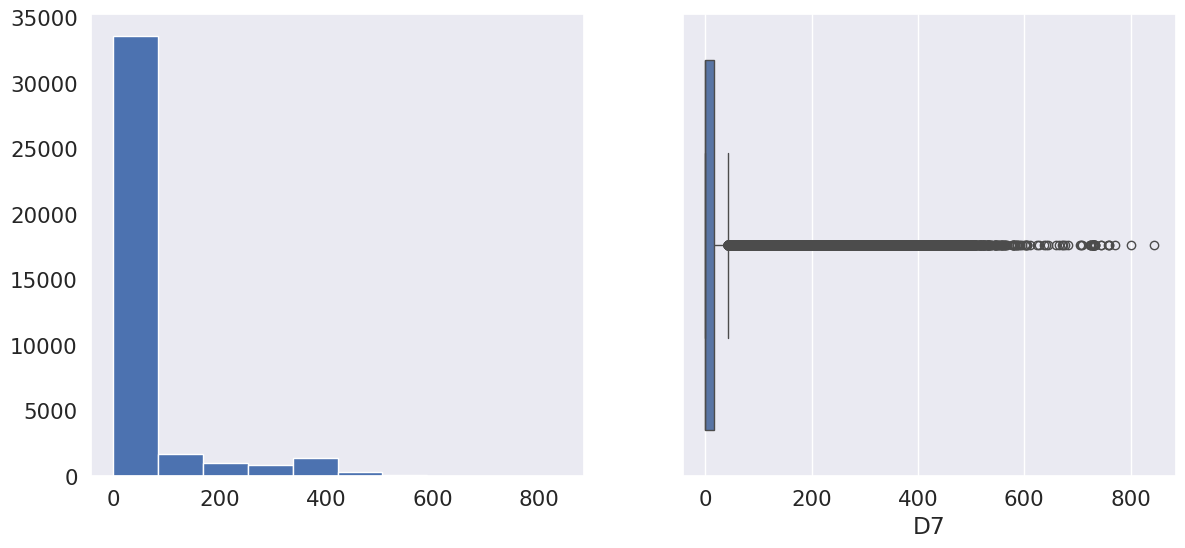

Column:  D8
Skew: 2.24
Kurtosis:  4.86


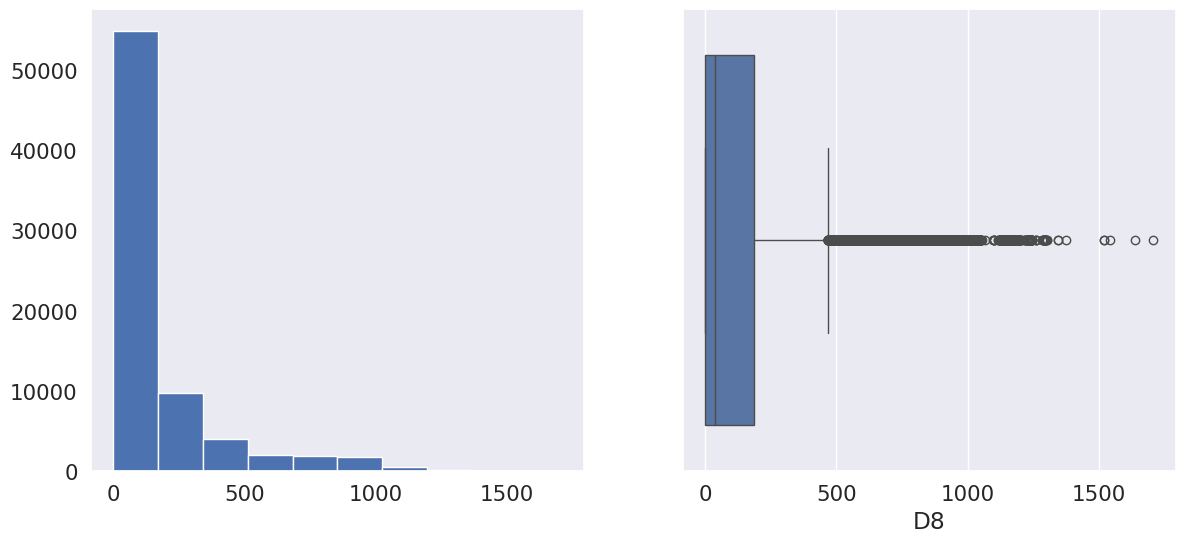

Column:  D9
Skew: -0.59
Kurtosis:  -1.14


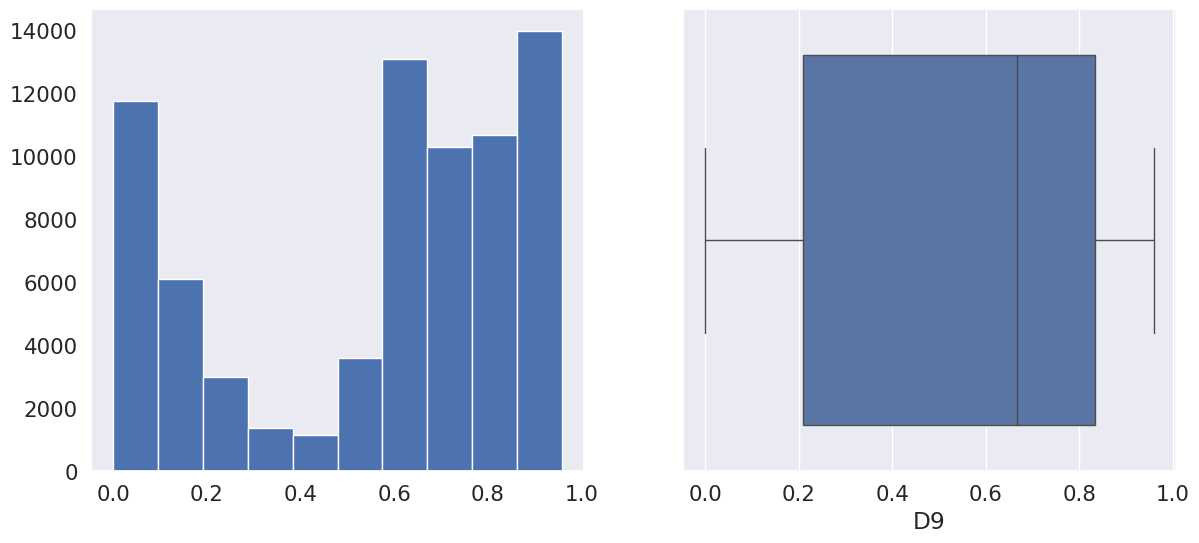

Column:  D10
Skew: 1.39
Kurtosis:  0.62


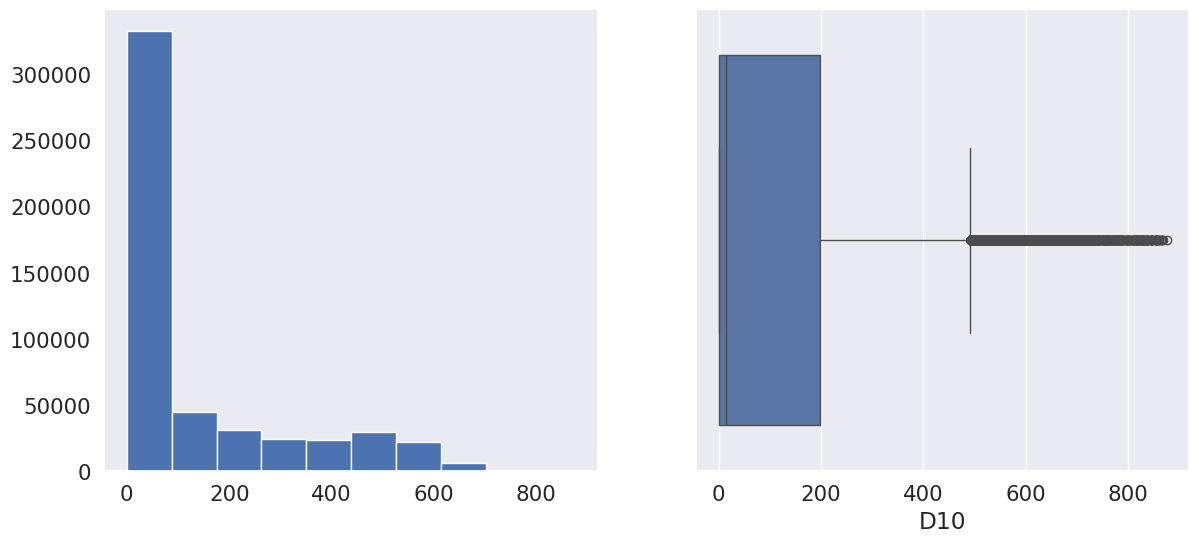

Column:  D11
Skew: 1.05
Kurtosis:  -0.25


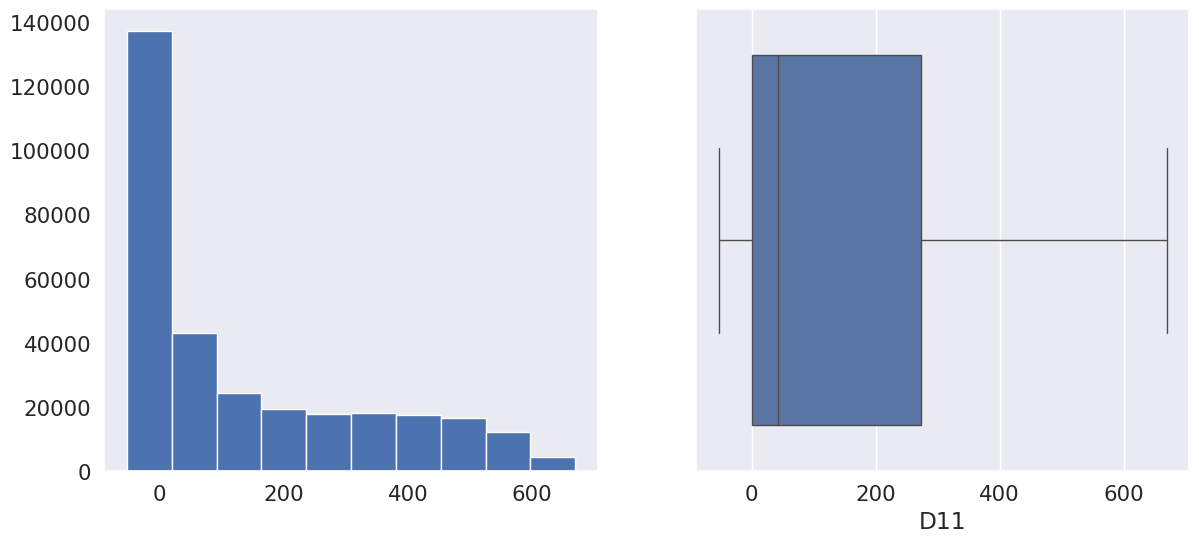

Column:  D12
Skew: 2.46
Kurtosis:  5.04


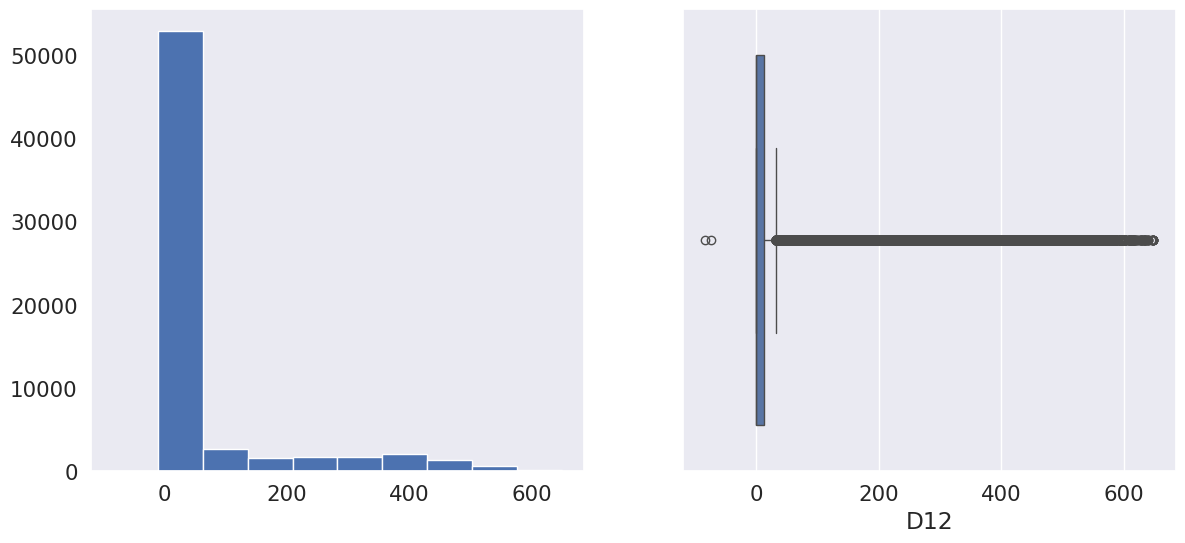

Column:  D13
Skew: 5.41
Kurtosis:  34.44


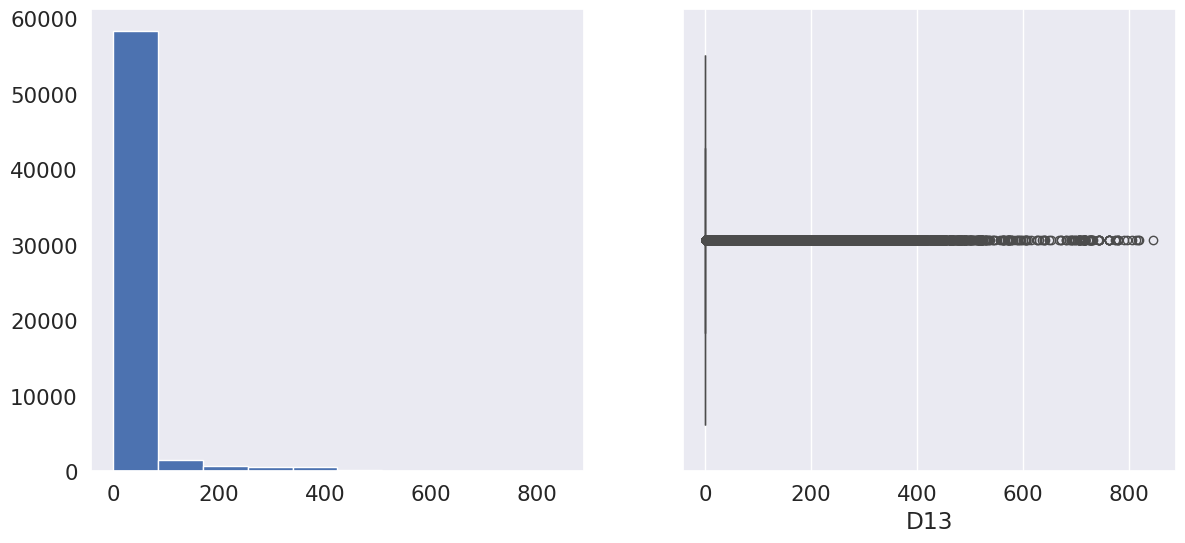

Column:  D14
Skew: 2.58
Kurtosis:  6.31


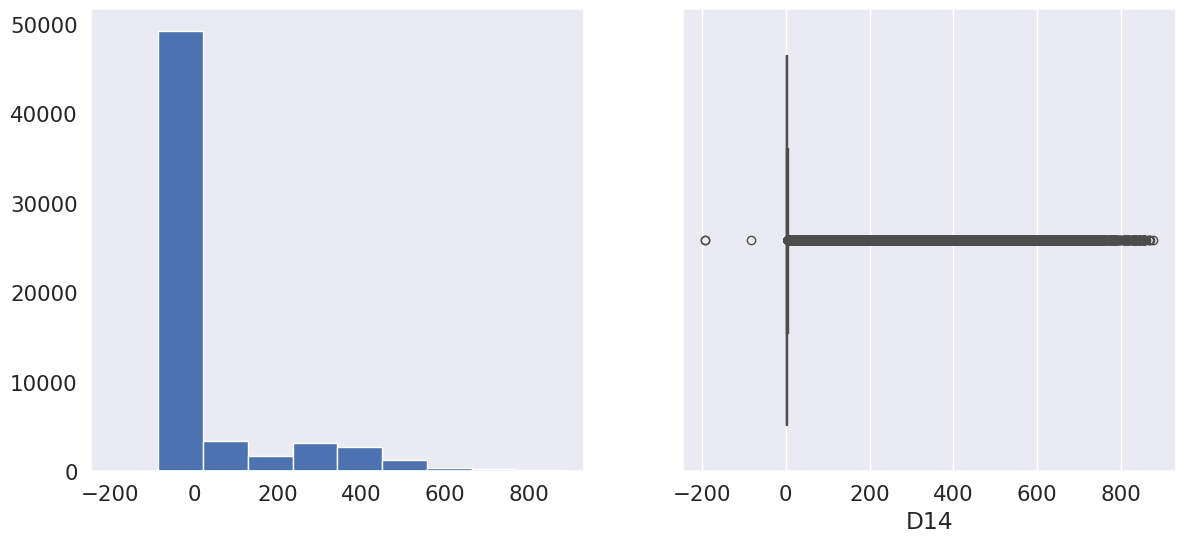

Column:  D15
Skew: 0.96
Kurtosis:  -0.53


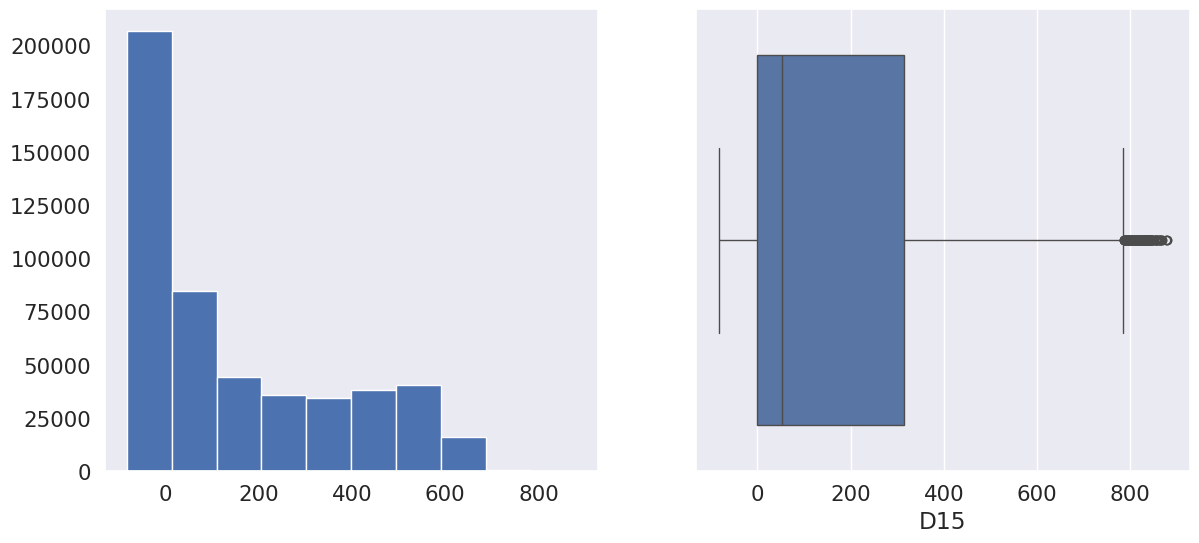

Column:  id_01
Skew: -3.67
Kurtosis:  16.7


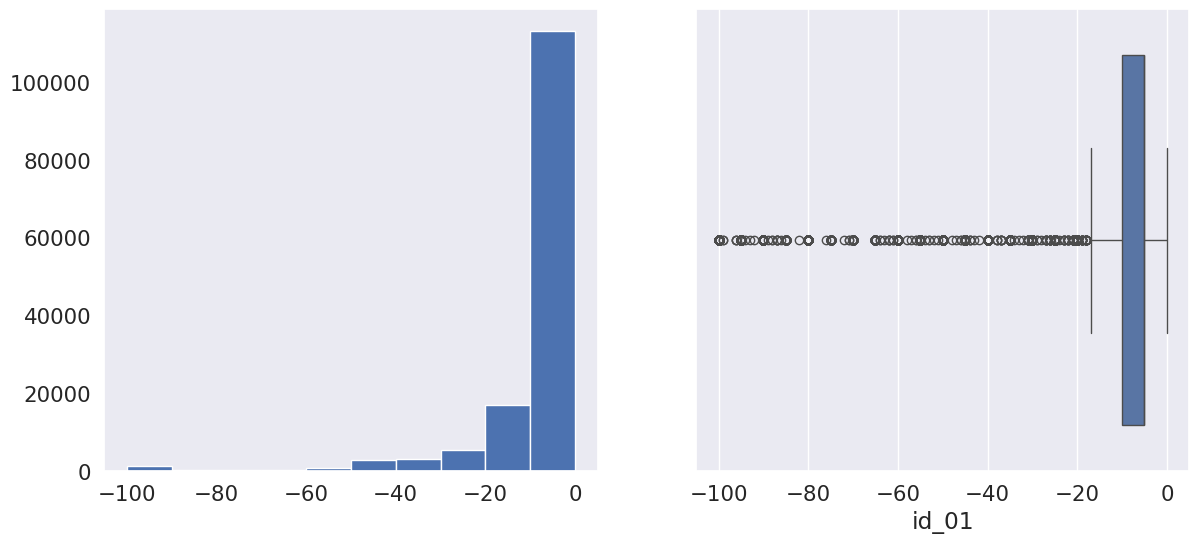

Column:  id_02
Skew: 1.84
Kurtosis:  4.01


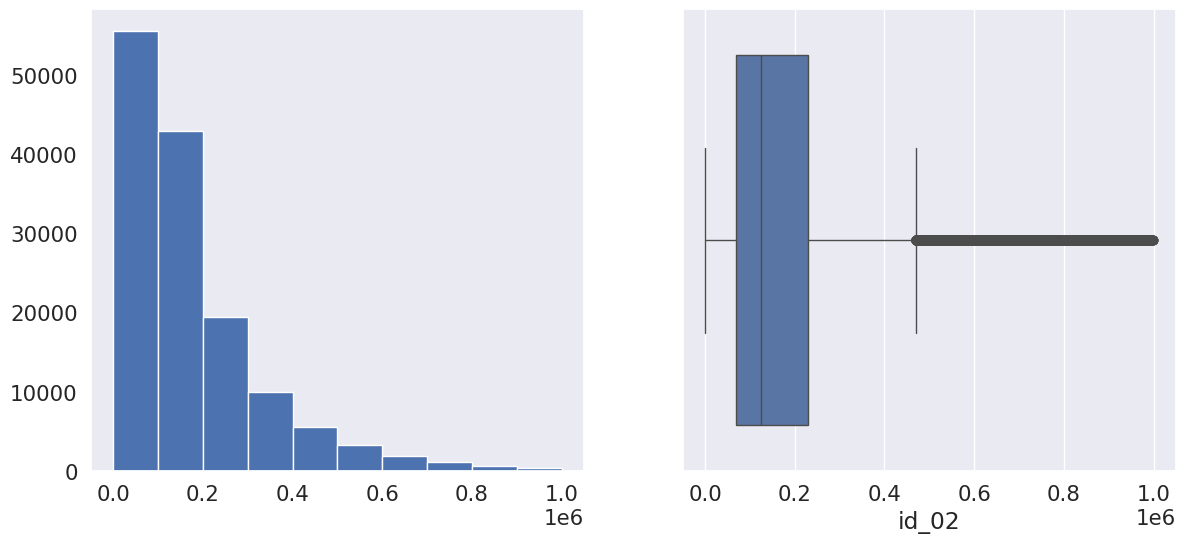

Column:  id_03
Skew: -0.78
Kurtosis:  103.41


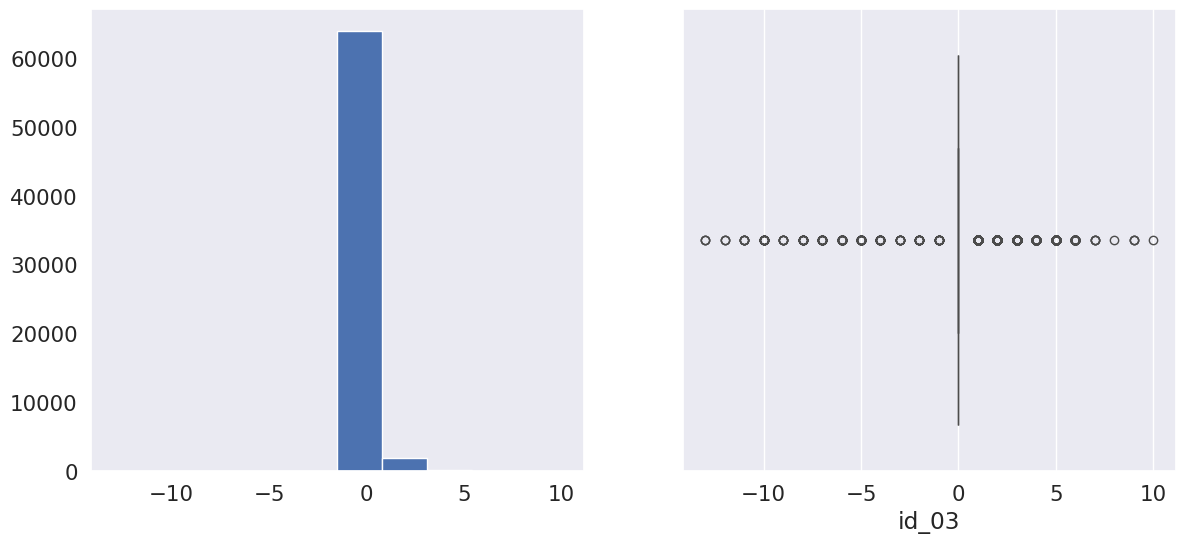

Column:  id_04
Skew: -14.29
Kurtosis:  250.59


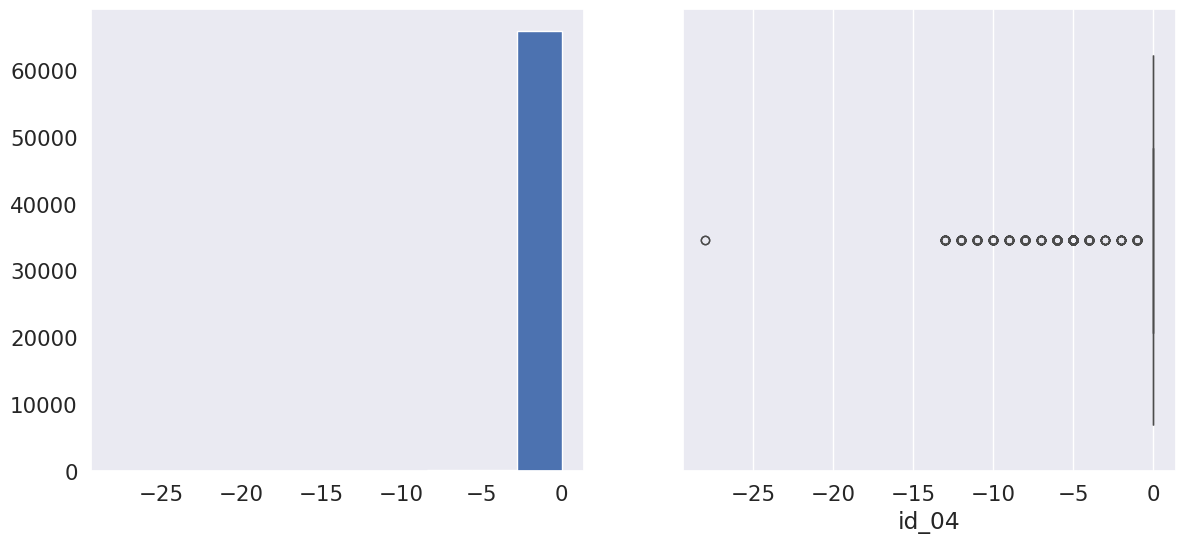

Column:  id_05
Skew: 2.45
Kurtosis:  13.75


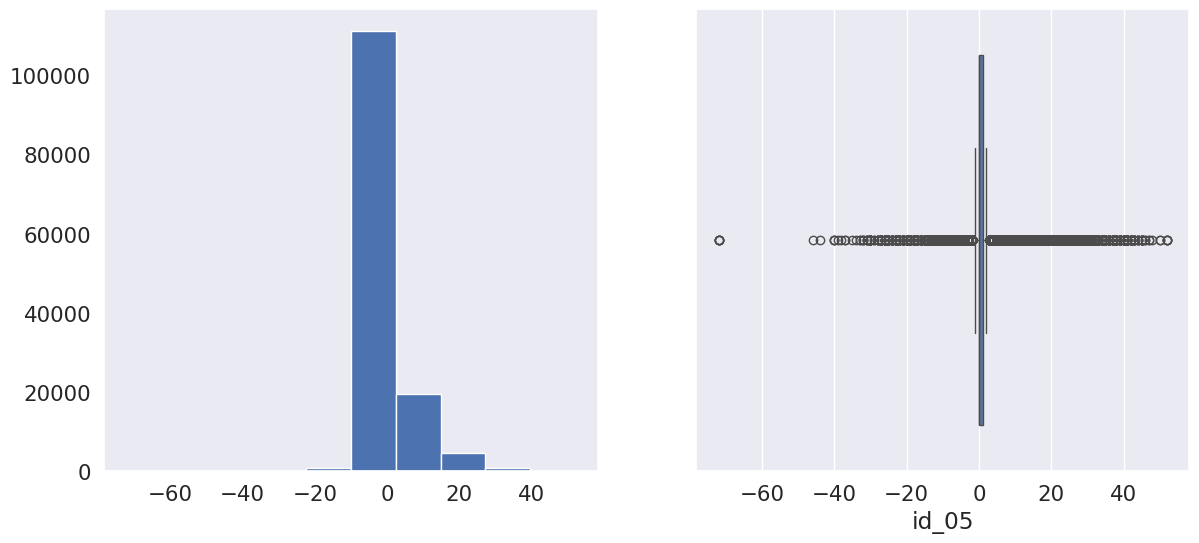

Column:  id_06
Skew: -3.9
Kurtosis:  17.41


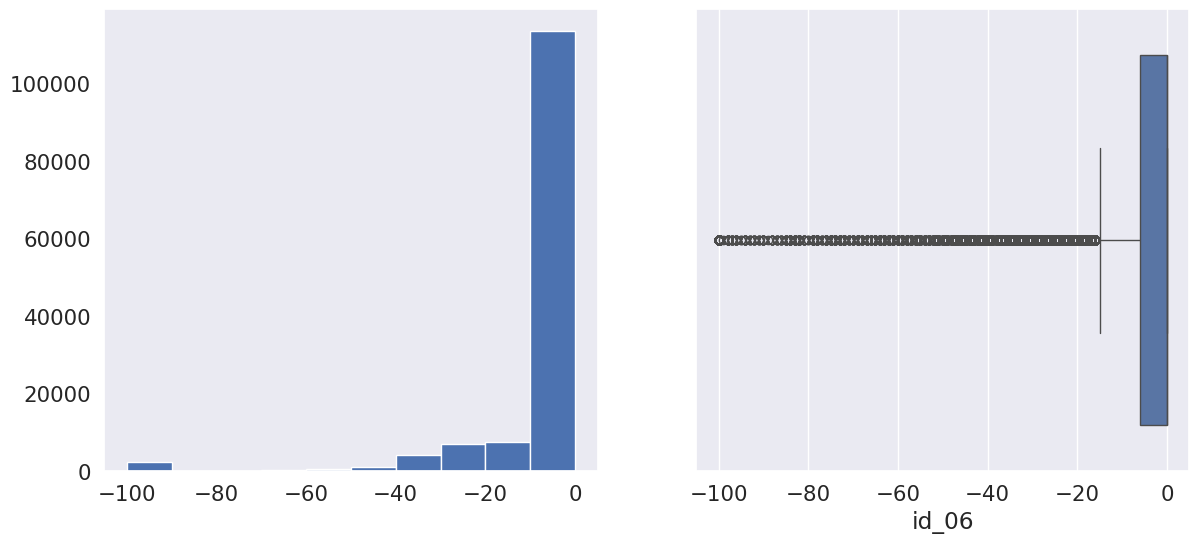

Column:  id_07
Skew: -0.16
Kurtosis:  0.67


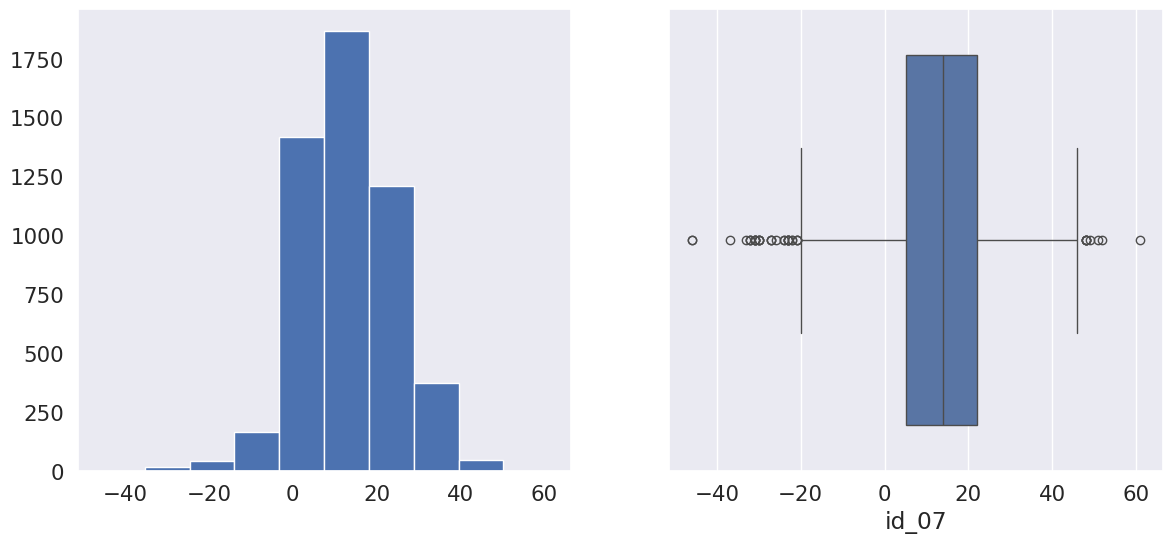

Column:  id_08
Skew: -1.02
Kurtosis:  0.68


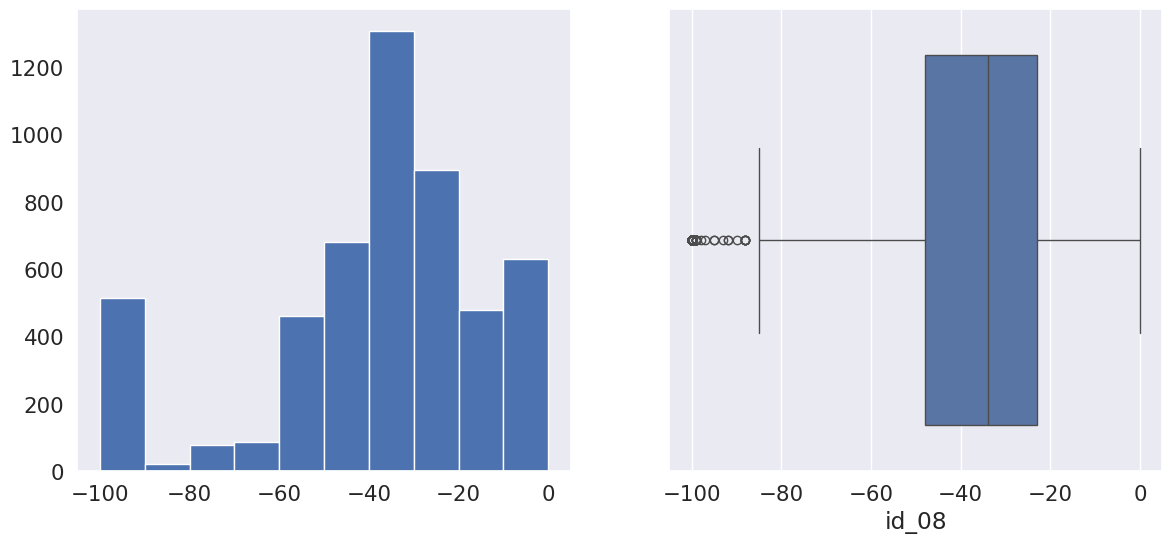

Column:  id_09
Skew: -4.8
Kurtosis:  194.11


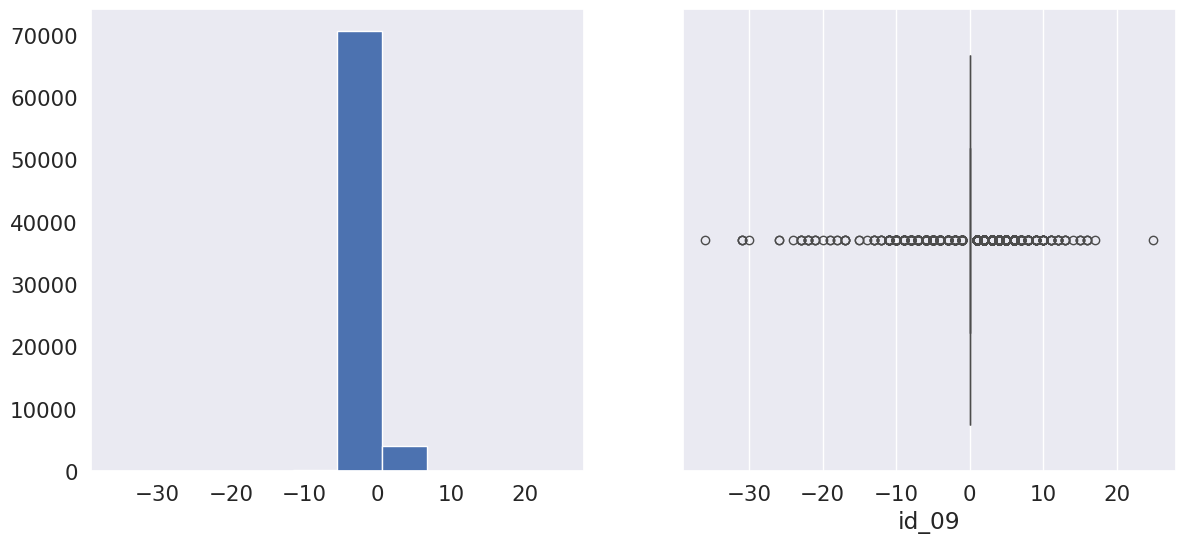

Column:  id_10
Skew: -19.48
Kurtosis:  542.61


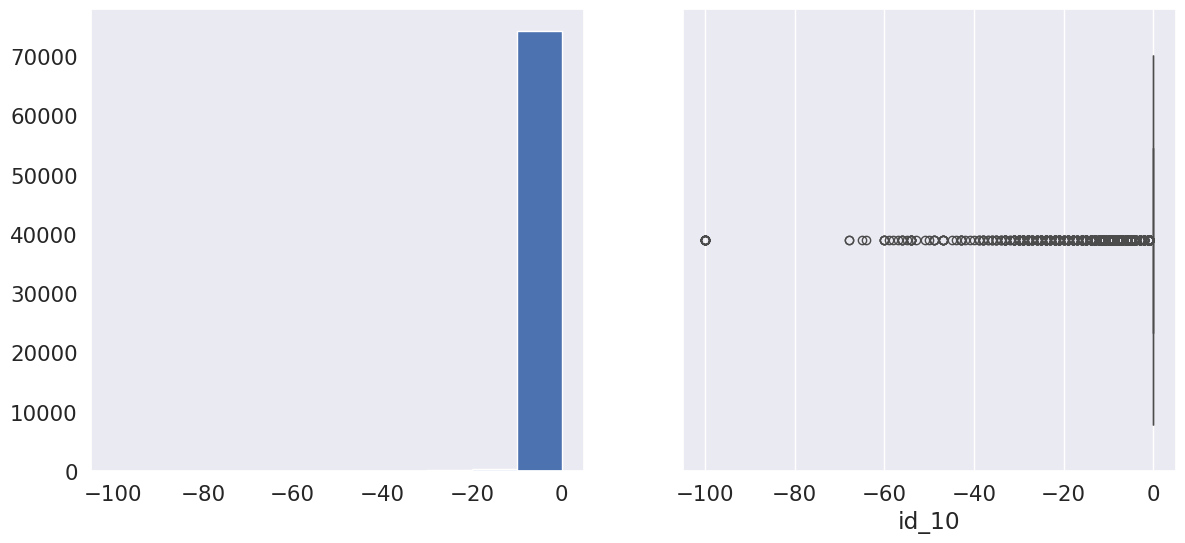

Column:  id_11
Skew: -4.83
Kurtosis:  24.54


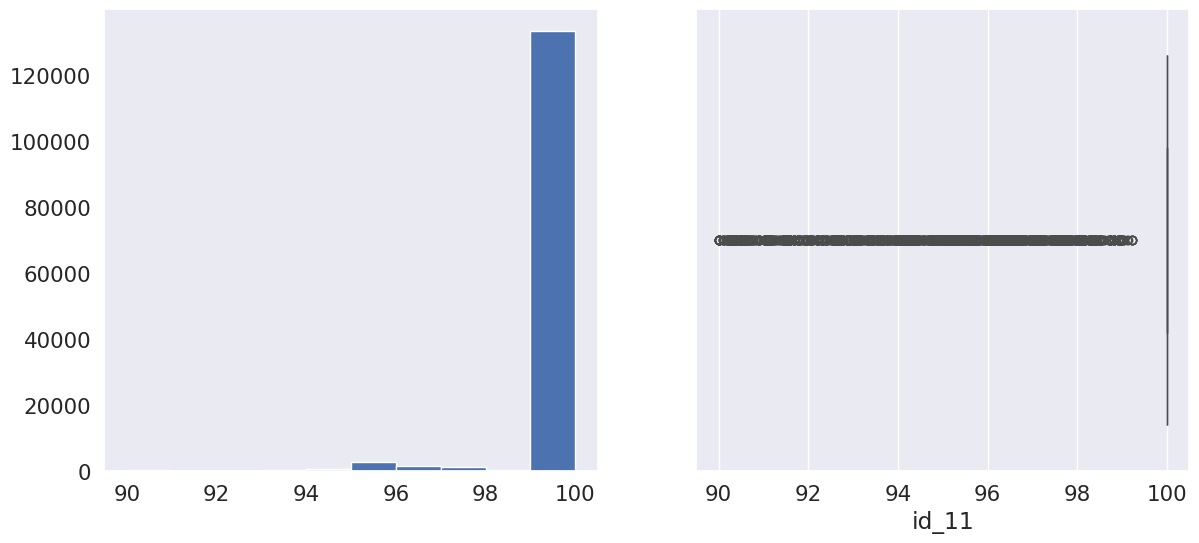

Column:  id_13
Skew: -1.26
Kurtosis:  1.27


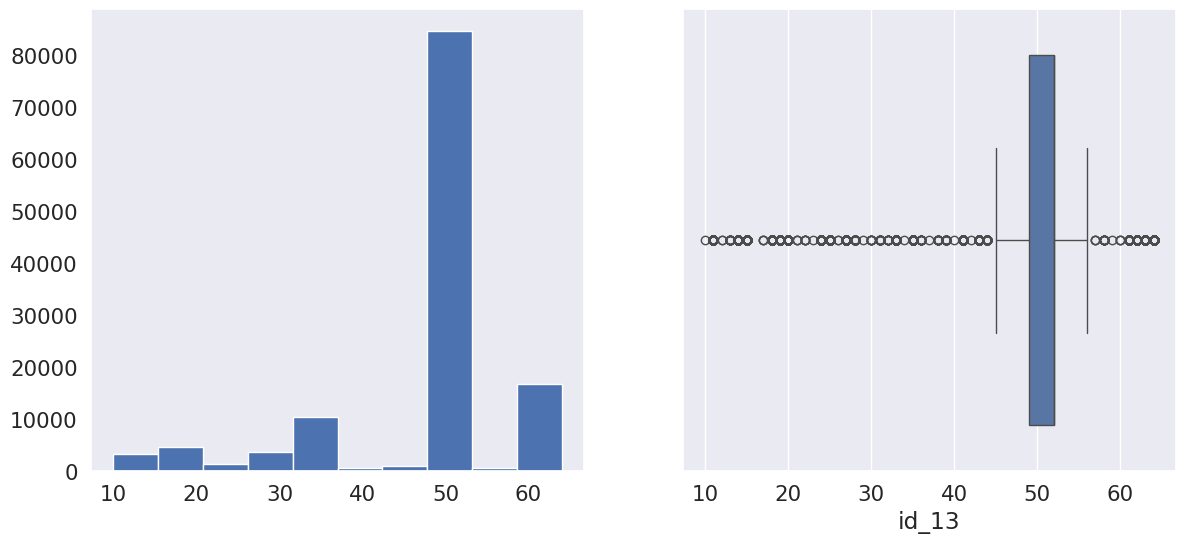

Column:  id_14
Skew: 2.71
Kurtosis:  25.76


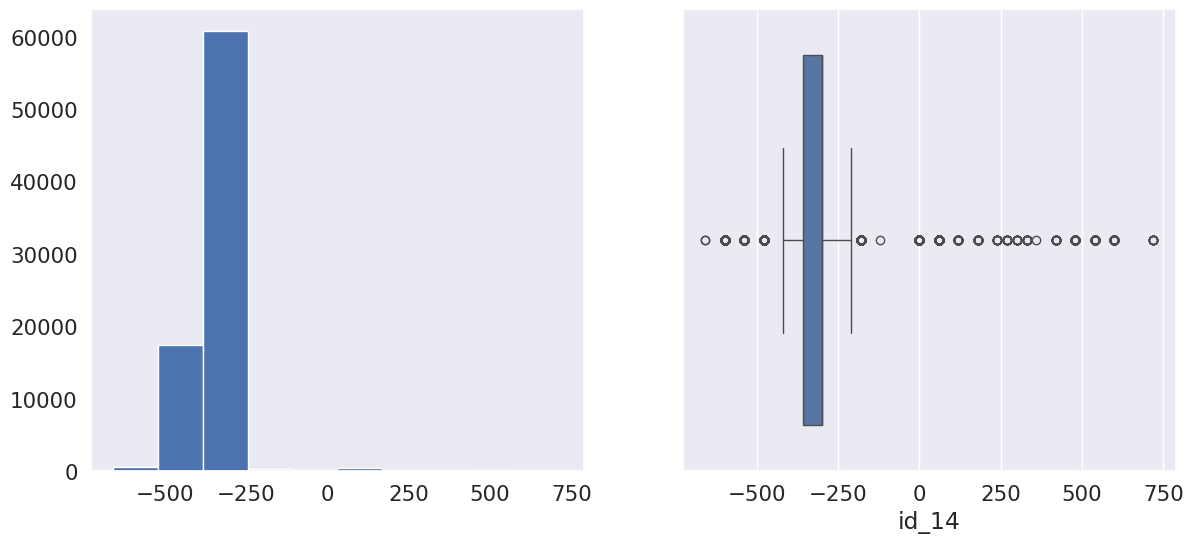

Column:  id_17
Skew: 0.14
Kurtosis:  -1.35


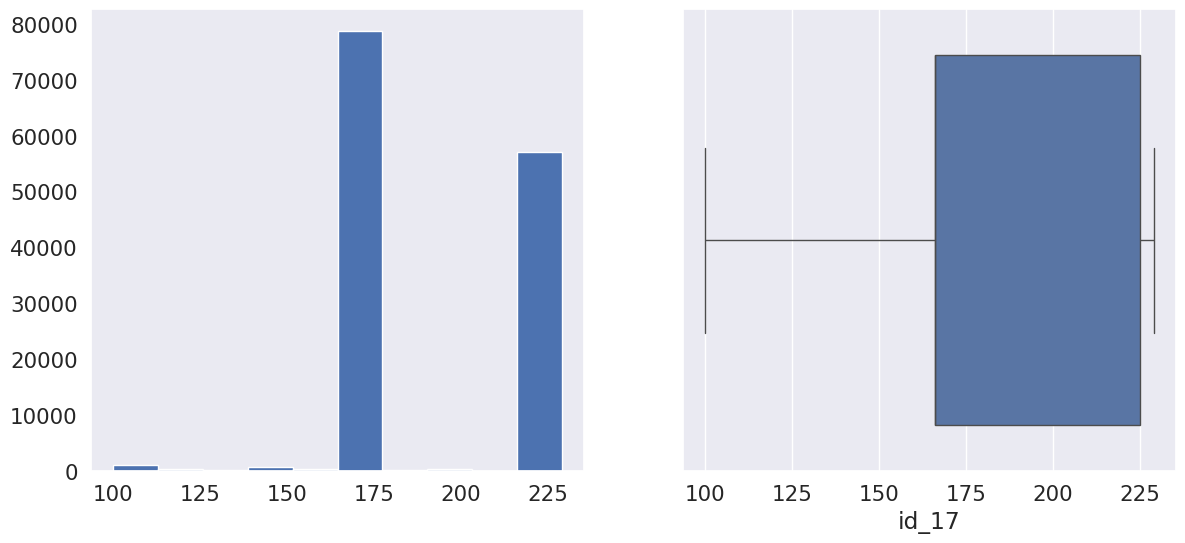

Column:  id_18
Skew: 2.07
Kurtosis:  13.29


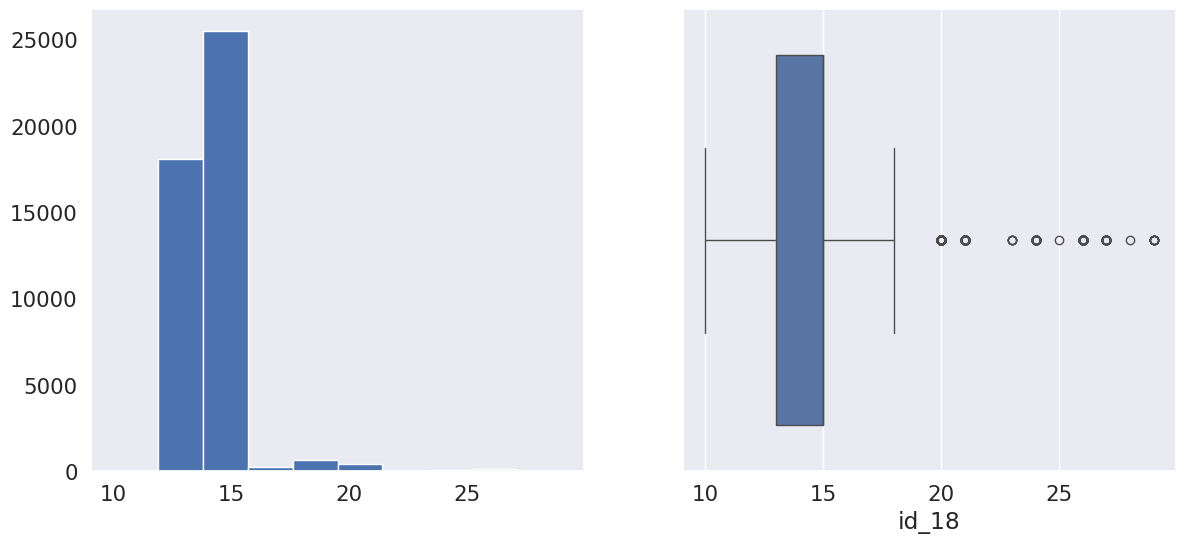

Column:  id_19
Skew: 0.2
Kurtosis:  -0.8


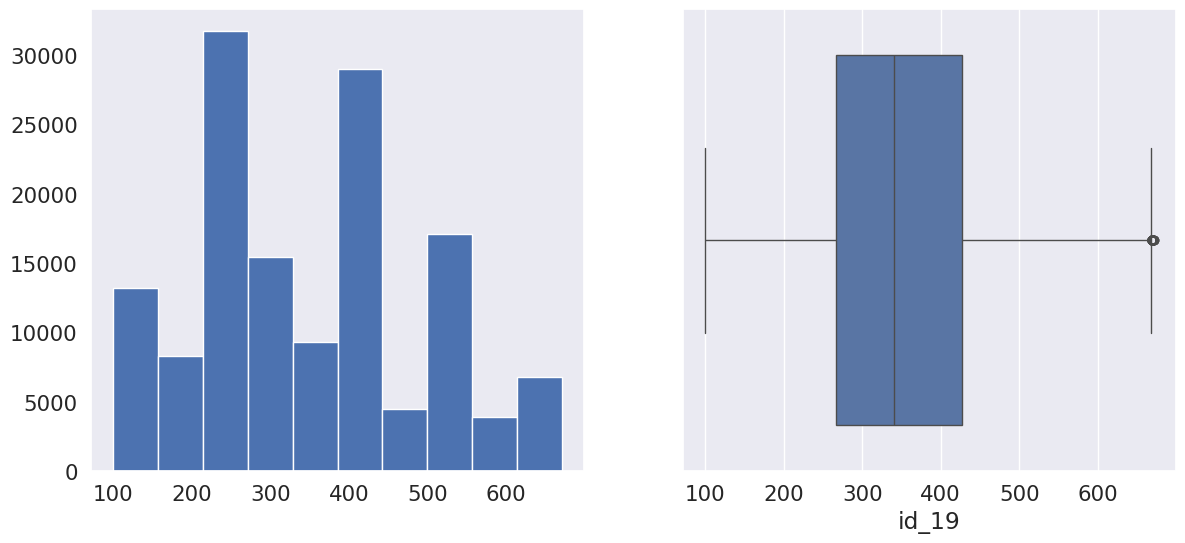

Column:  id_20
Skew: -0.32
Kurtosis:  -1.32


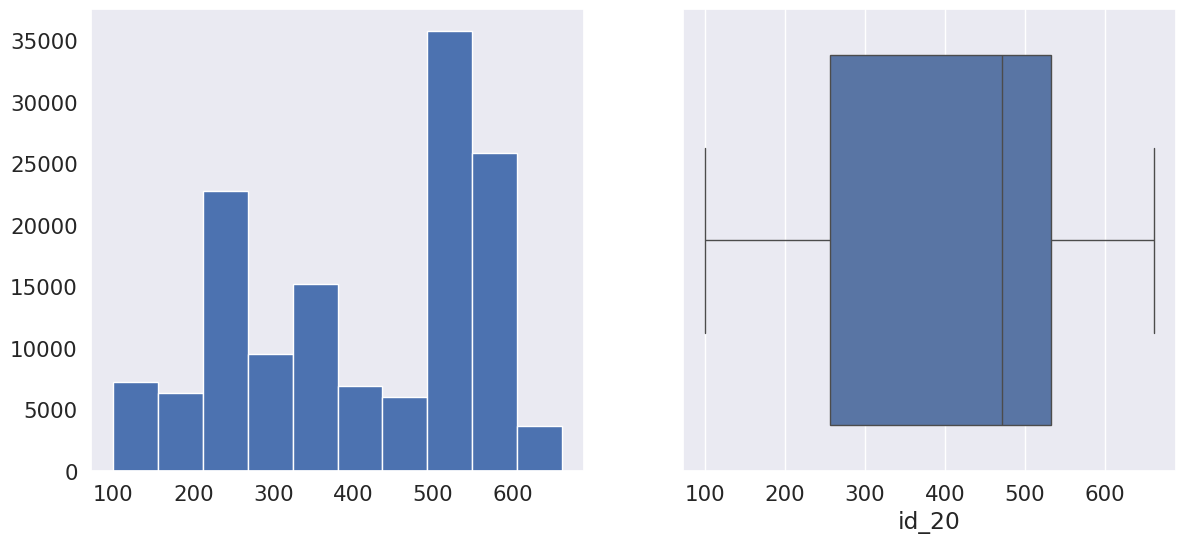

Column:  id_21
Skew: 1.24
Kurtosis:  0.09


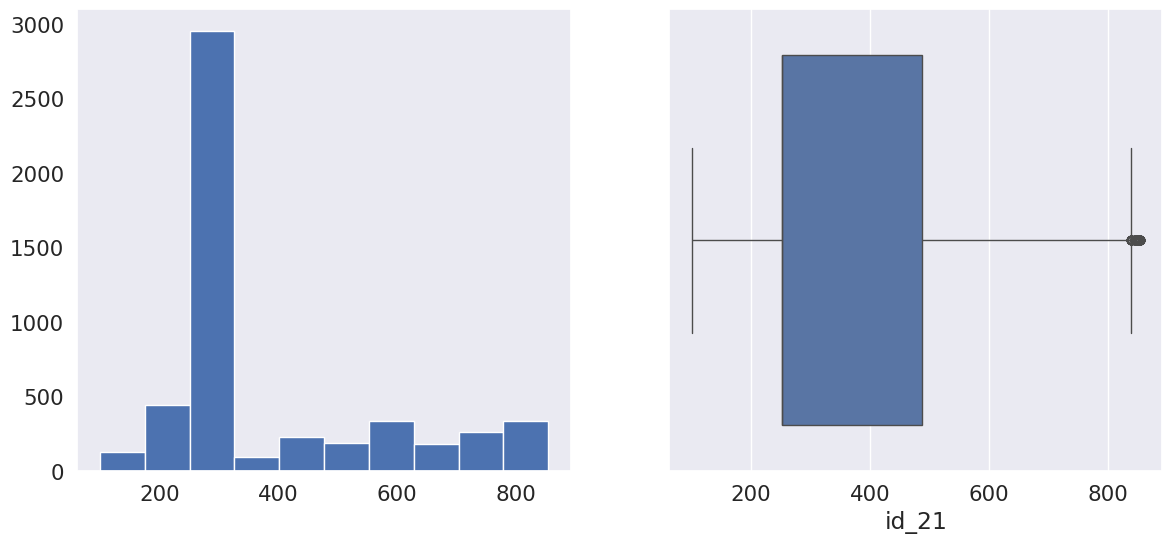

Column:  id_22
Skew: 3.23
Kurtosis:  8.6


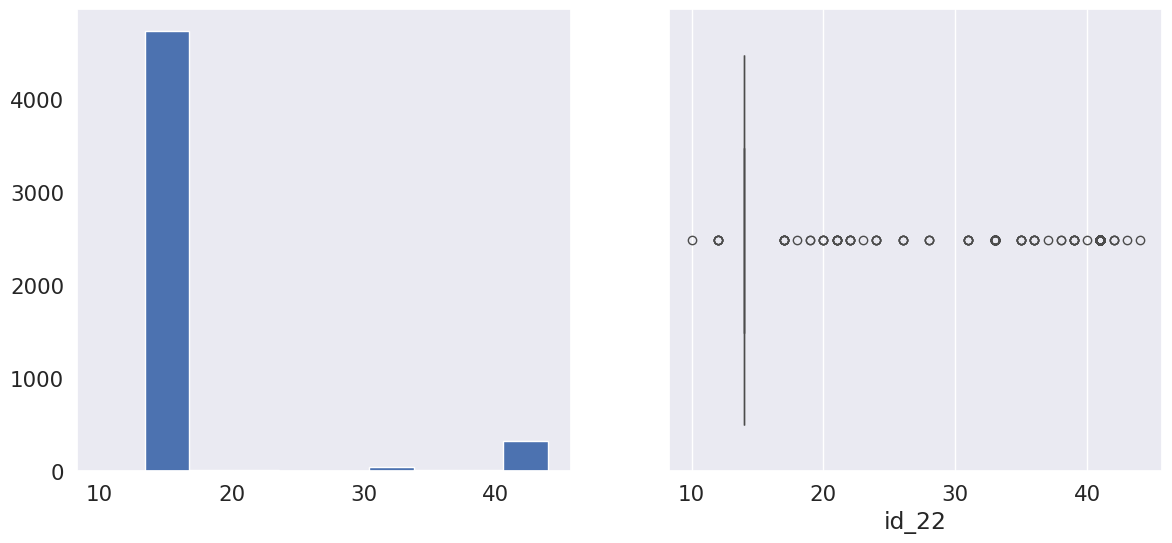

Column:  id_24
Skew: 1.29
Kurtosis:  2.82


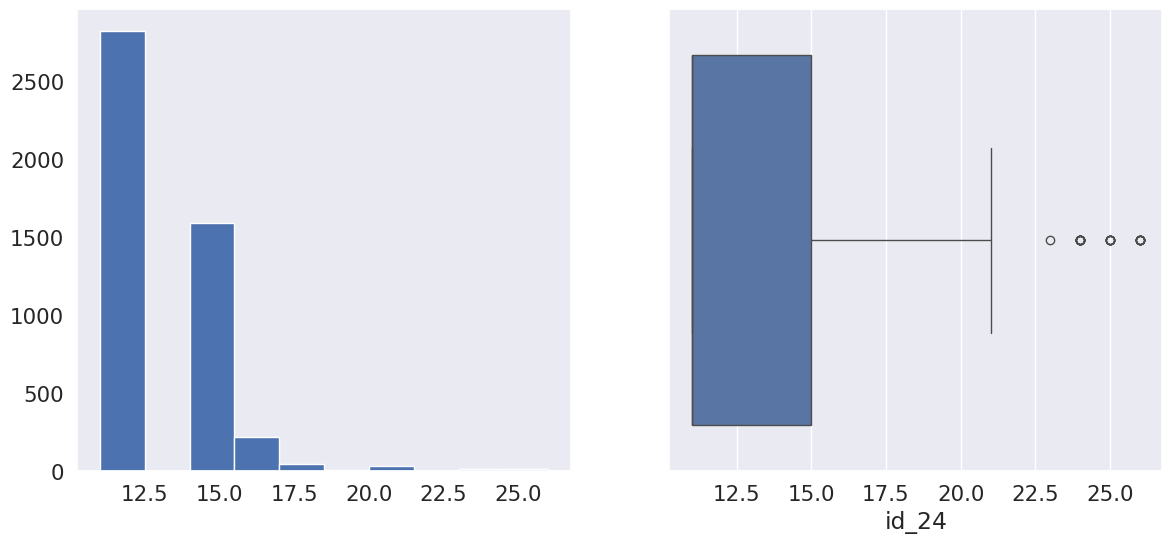

Column:  id_25
Skew: 0.05
Kurtosis:  0.01


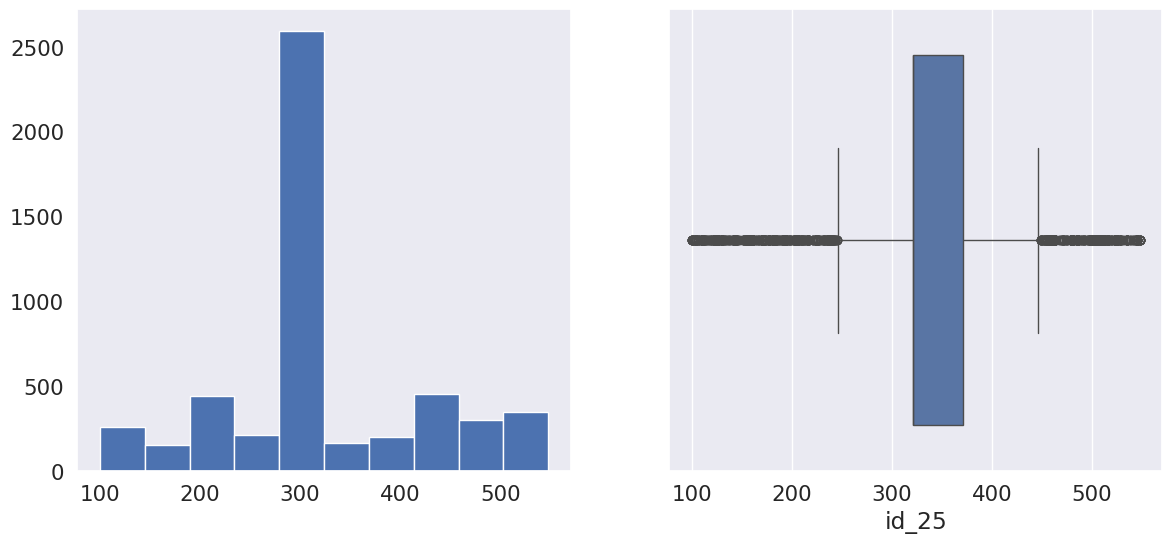

Column:  id_26
Skew: 0.01
Kurtosis:  -0.86


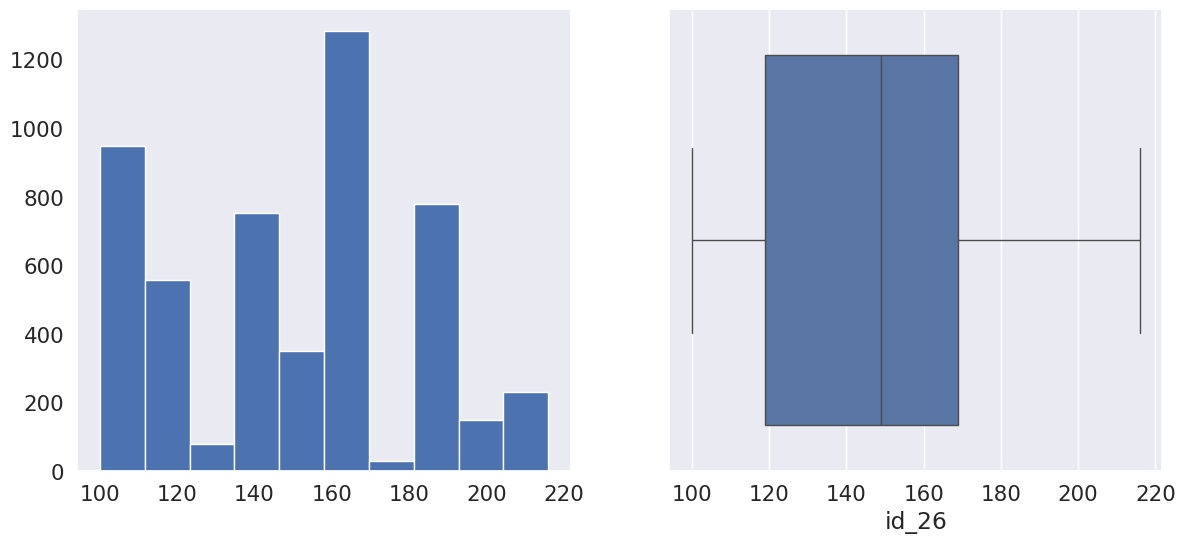

Column:  id_32
Skew: 0.74
Kurtosis:  -1.13


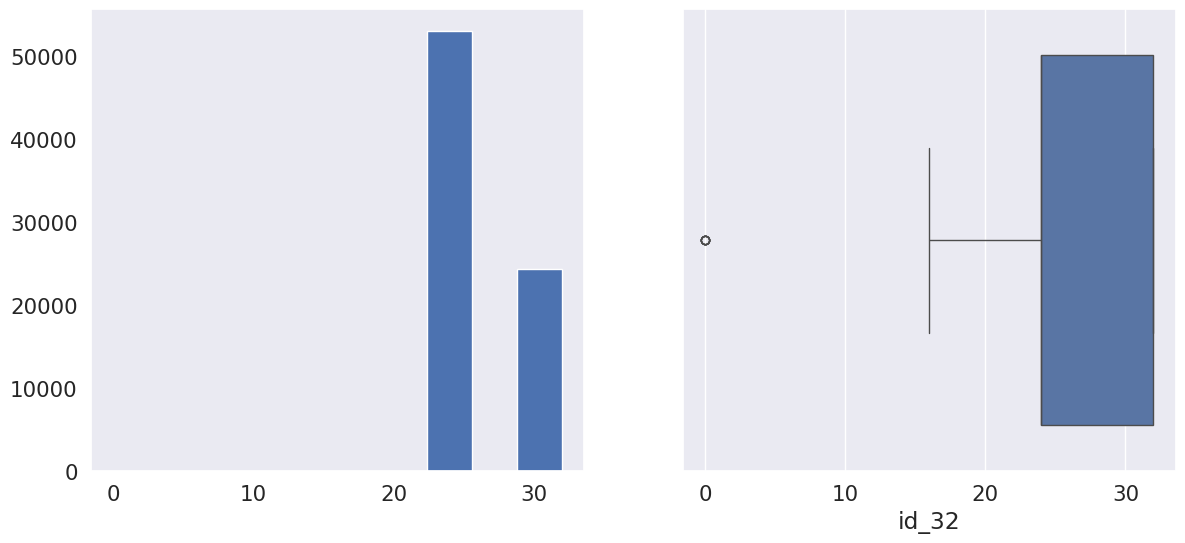

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = d0.select_dtypes(include=np.number).columns.tolist()
sns.set(font_scale=1.4)

for col in num_cols:
    if col.startswith('V') and col[1:].isdigit() and 1 <= int(col[1:]) <= 339:
        continue  
    print('Column: ', col)
    print('Skew:', round(d0[col].skew(), 2))
    print('Kurtosis: ', round(d0[col].kurtosis(), 2))
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    d0[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=d0[col])
    plt.show()


Analizando CARD1

In [7]:
d0.card1.value_counts()

card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
7914         1
15126        1
2570         1
9115         1
1099         1
Name: count, Length: 13553, dtype: int64

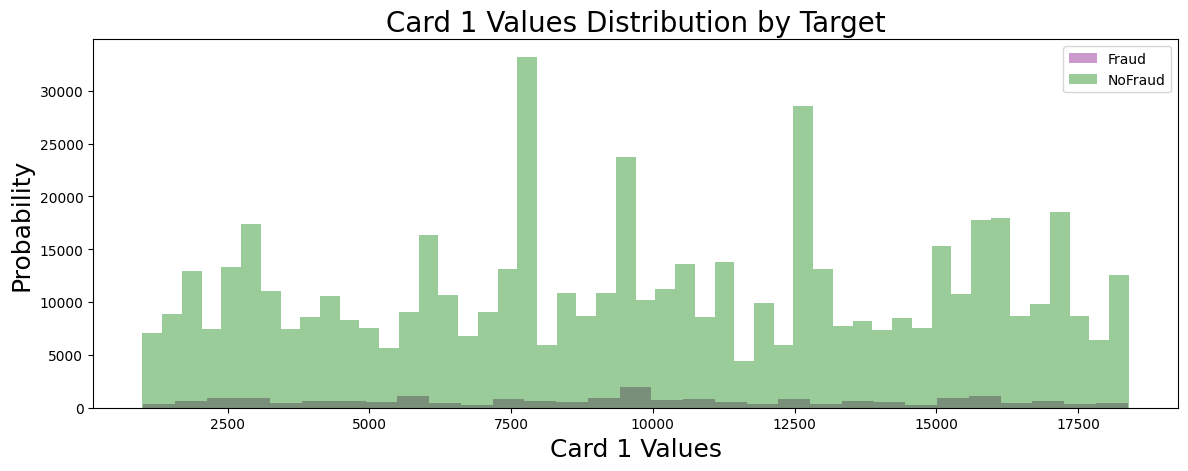

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 22))
plt.subplot(413)

# Plot the histogram for 'card1' with different colors for 'isFraud' values
g = sns.distplot(d0[d0['isFraud'] == 1]['card1'], color='purple', kde=False, label='Fraud')
g = sns.distplot(d0[d0['isFraud'] == 0]['card1'], color='green', kde=False, label='NoFraud')
g.legend()
g.set_title("Card 1 Values Distribution by Target", fontsize=20)
g.set_xlabel("Card 1 Values", fontsize=18)
g.set_ylabel("Probability", fontsize=18)

plt.show()


Analizando CARD2

In [8]:
d0.card2.value_counts()

card2
321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
447.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: count, Length: 500, dtype: int64

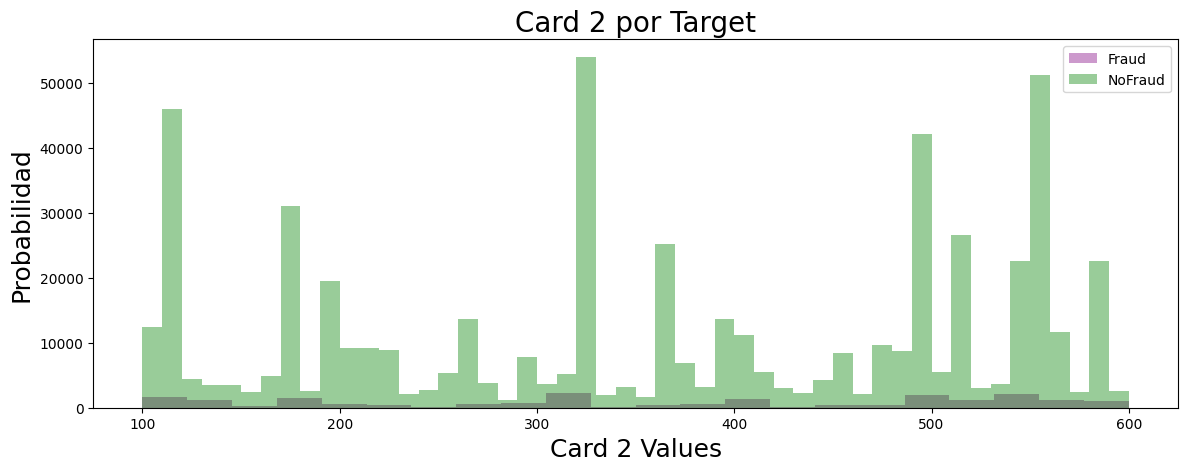

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 22))
plt.subplot(413)

# Plot the histogram for 'card1' with different colors for 'isFraud' values
g = sns.distplot(d0[d0['isFraud'] == 1]['card2'], color='purple', kde=False, label='Fraud')
g = sns.distplot(d0[d0['isFraud'] == 0]['card2'], color='green', kde=False, label='NoFraud')
g.legend()
g.set_title("Card 2 por Target", fontsize=20)
g.set_xlabel("Card 2 Values", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()


Analizando CARD3


In [9]:
d0.card3.value_counts()

card3
150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
170.0         1
125.0         1
164.0         1
201.0         1
173.0         1
Name: count, Length: 114, dtype: int64

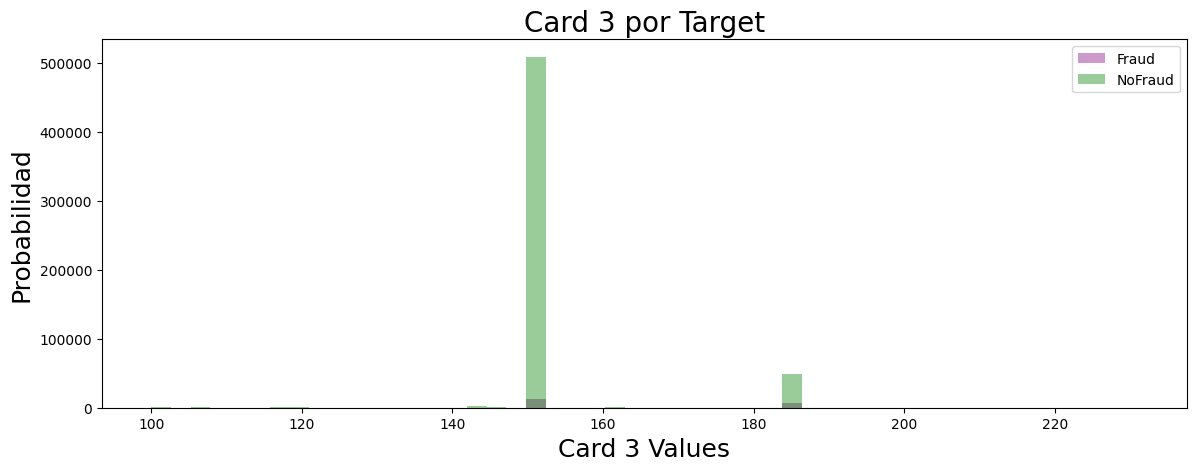

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 22))
plt.subplot(413)

# Plot the histogram for 'card1' with different colors for 'isFraud' values
g = sns.distplot(d0[d0['isFraud'] == 1]['card3'], color='purple', kde=False, label='Fraud')
g = sns.distplot(d0[d0['isFraud'] == 0]['card3'], color='green', kde=False, label='NoFraud')
g.legend()
g.set_title("Card 3 por Target", fontsize=20)
g.set_xlabel("Card 3 Values", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()


Analizando CARD4

In [10]:
d0.card4.value_counts()

card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

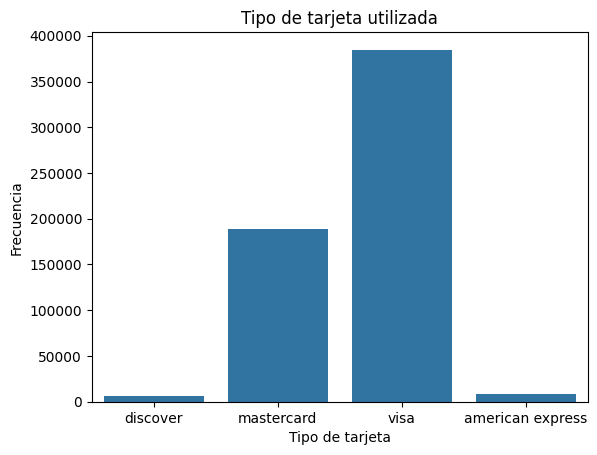

In [13]:
plt.title('Tipo de tarjeta utilizada')
sns.countplot(x=d0.card4)
plt.xlabel('Tipo de tarjeta')
plt.ylabel('Frecuencia')
plt.show()

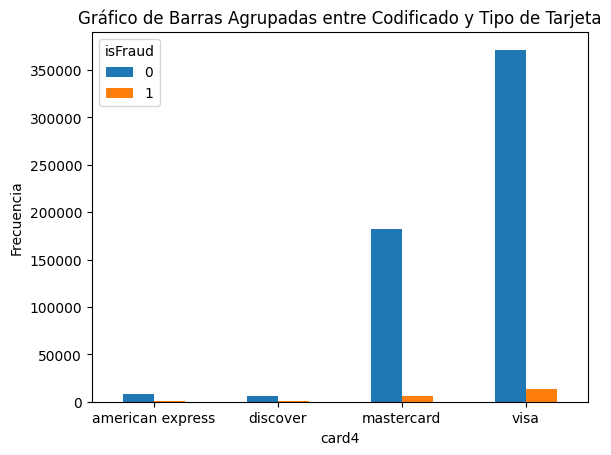

In [14]:
card4p = pd.crosstab(d0['card4'], d0['isFraud'])
ax = card4p.plot(kind='bar', stacked=False)
ax.set_xticklabels(card4p.index, rotation=0)
#etiquetas
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupadas entre Codificado y Tipo de Tarjeta')

plt.show()

Analizando CARD5

In [11]:
d0.card5.value_counts()

card5
226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
          ...  
173.0         1
201.0         1
221.0         1
234.0         1
196.0         1
Name: count, Length: 119, dtype: int64

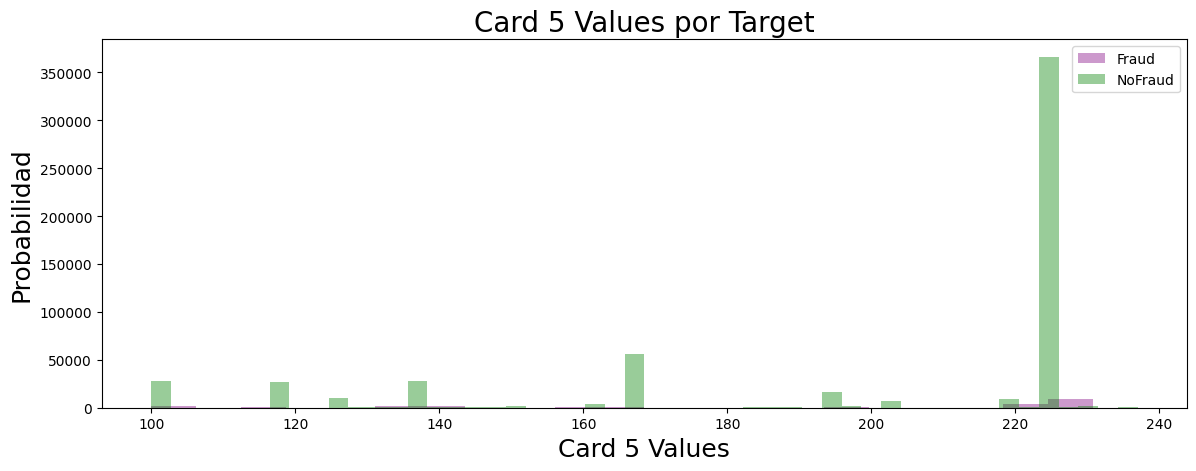

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 22))
plt.subplot(413)

# Plot the histogram for 'card1' with different colors for 'isFraud' values
g = sns.distplot(d0[d0['isFraud'] == 1]['card5'], color='purple', kde=False, label='Fraud')
g = sns.distplot(d0[d0['isFraud'] == 0]['card5'], color='green', kde=False, label='NoFraud')
g.legend()
g.set_title("Card 5 Values por Target", fontsize=20)
g.set_xlabel("Card 5 Values", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()


Analizando CARD6

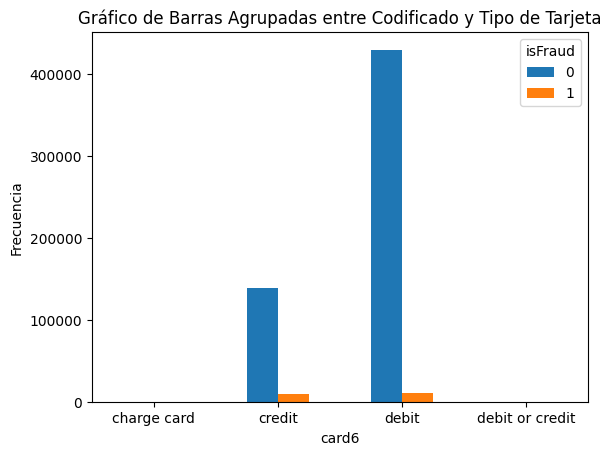

In [17]:
card6p = pd.crosstab(d0['card6'], d0['isFraud'])
ax = card6p.plot(kind='bar', stacked=False)
ax.set_xticklabels(card6p.index, rotation=0)
#etiquetas
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupadas entre Codificado y Tipo de Tarjeta')

plt.show()

A pesar de que hay mas transacciones con la tarjeta de debito, parece que hay un numero similar de fraude en ambas tarjetas

### Revisando si hay faltantes

In [12]:
faltantes = d0.isnull().sum()
faltantes_df = pd.DataFrame(faltantes, columns=['Cantidad de Faltantes'])

In [13]:
porcentaje = (faltantes / len(d0)) * 100
porcentaje_df = pd.DataFrame({
    'Columna': faltantes.index,   
    'Valores Faltantes': faltantes.values,  
    'Porcentaje Faltante': porcentaje.values
})

In [14]:
porcentaje_df.value_counts() ## Hay un gran numero de faltantes

Columna  Valores Faltantes  Porcentaje Faltante
isFraud  0                  0.000000               1
C1       0                  0.000000               1
C10      0                  0.000000               1
C11      0                  0.000000               1
C12      0                  0.000000               1
                                                  ..
D2       280797             47.549192              1
D3       262878             44.514851              1
D4       168922             28.604667              1
D5       309841             52.467403              1
D6       517353             87.606767              1
Name: count, Length: 434, dtype: int64

In [15]:
corte = 0.7
porcentaje = (d0.isnull().sum() / len(d0)).sort_values(ascending=False)

In [16]:
columnas_vacias = porcentaje[porcentaje > corte].index

In [17]:
d1 = d0.drop(columns=columnas_vacias)

Se eliminan las columnas vacias y ahora, hay 226

In [18]:
d1 

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ...   V312        V313  \
0       13926    NaN  150.0    discover  142.0  ...    0.0    0.000000   
1        2755  404.0  150.0  mastercard  102.0  ...    0.0    0.000000   
2        4663  490.0  150.0        visa  166.0  ...    0.0    0.000000   
3       18132  567.0  150.0  mastercard  117.0  ...  135.0    0.000000   
4        4497  514.0  150.0  mastercard  102.0  ...    0.0    0.000000   
...       ...    ...    ...         ...    ...  ...    ...         ...   
590535   6550    NaN  150.0        visa  226.0  ...    0.0   47.950001   
590536  10444  225.0  150.0  mastercard  224.0  ...    0.0    0.000000   
590537  12037  595.0  150.0  mastercard  224.0  ...    0.0    0.000000   
590538   7826  481.0  150.0  mastercard  224.0  ...  117.0  317.500000   
590539  15066  170.0  150.0  mastercard  102.0  ...    0.0    0.000000   

              V314        V315  V316    V317   V318        V319        V320  \
0         0.000000    0.000000   0.0   117.0    0.0    0.000000    0.000000   
1         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
2         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
3         0.000000    0.000000  50.0  1404.0  790.0    0.000000    0.000000   
4         0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
...            ...         ...   ...     ...    ...         ...         ...   
590535   47.950001   47.950001   0.0     0.0    0.0    0.000000    0.000000   
590536    0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
590537    0.000000    0.000000   0.0     0.0    0.0    0.000000    0.000000   
590538  669.500000  317.500000   0.0  2234.0    0.0    0.000000    0.000000   
590539    0.000000    0.000000   0.0     0.0    0.0  279.950012  279.950012   

              V321  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
590535    0.000000  
590536    0.000000  
590537    0.000000  
590538    0.000000  
590539  279.950012  

[590540 rows x 226 columns]

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

Convertir todas las columnas objetos hacia float

In [20]:
for f in d1.drop('isFraud', axis=1).columns:
    if d1[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(d1[f].values))
        d1[f] = lbl.transform(list(d1[f].values))

In [21]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(17)
memory usage: 1018.2 MB


Eliminacion por Correlacion

In [22]:
c_m = d1.corr().abs()
upper = c_m.where(np.triu(np.ones(c_m.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
d1.drop(d1[to_drop], axis=1)

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  \
0             2987000        0           68.50          4  13926    NaN   
1             2987001        0           29.00          4   2755  404.0   
2             2987002        0           59.00          4   4663  490.0   
3             2987003        0           50.00          4  18132  567.0   
4             2987004        0           50.00          1   4497  514.0   
...               ...      ...             ...        ...    ...    ...   
590535        3577535        0           49.00          4   6550    NaN   
590536        3577536        0           39.50          4  10444  225.0   
590537        3577537        0           30.95          4  12037  595.0   
590538        3577538        0          117.00          4   7826  481.0   
590539        3577539        0          279.95          4  15066  170.0   

        card3  card4  card5  card6  ...        V130        V135  V281  V282  \
0       150.0      1  142.0      1  ...    0.000000    0.000000   0.0   1.0   
1       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
2       150.0      4  166.0      2  ...    0.000000    0.000000   0.0   1.0   
3       150.0      2  117.0      2  ...  354.000000    0.000000   0.0   0.0   
4       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
...       ...    ...    ...    ...  ...         ...         ...   ...   ...   
590535  150.0      4  226.0      2  ...   47.950001    0.000000   0.0   1.0   
590536  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590537  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590538  150.0      2  224.0      2  ...  117.000000    0.000000   0.0   2.0   
590539  150.0      2  102.0      1  ...    0.000000  279.950012   0.0   2.0   

        V286  V288  V290  V300  V305        V313  
0        0.0   0.0   1.0   0.0   1.0    0.000000  
1        0.0   0.0   1.0   0.0   1.0    0.000000  
2        0.0   0.0   1.0   0.0   1.0    0.000000  
3        0.0   0.0   1.0   0.0   1.0    0.000000  
4        0.0   0.0   1.0   0.0   1.0    0.000000  
...      ...   ...   ...   ...   ...         ...  
590535   0.0   1.0   1.0   0.0   1.0   47.950001  
590536   0.0   0.0   1.0   0.0   1.0    0.000000  
590537   0.0   0.0   1.0   0.0   1.0    0.000000  
590538   0.0   1.0   1.0   0.0   1.0  317.500000  
590539   0.0   0.0   1.0   1.0   1.0    0.000000  

[590540 rows x 70 columns]

In [23]:
d1 = d1.drop(d1[to_drop], axis=1)

In [24]:
d1

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  \
0             2987000        0           68.50          4  13926    NaN   
1             2987001        0           29.00          4   2755  404.0   
2             2987002        0           59.00          4   4663  490.0   
3             2987003        0           50.00          4  18132  567.0   
4             2987004        0           50.00          1   4497  514.0   
...               ...      ...             ...        ...    ...    ...   
590535        3577535        0           49.00          4   6550    NaN   
590536        3577536        0           39.50          4  10444  225.0   
590537        3577537        0           30.95          4  12037  595.0   
590538        3577538        0          117.00          4   7826  481.0   
590539        3577539        0          279.95          4  15066  170.0   

        card3  card4  card5  card6  ...        V130        V135  V281  V282  \
0       150.0      1  142.0      1  ...    0.000000    0.000000   0.0   1.0   
1       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
2       150.0      4  166.0      2  ...    0.000000    0.000000   0.0   1.0   
3       150.0      2  117.0      2  ...  354.000000    0.000000   0.0   0.0   
4       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
...       ...    ...    ...    ...  ...         ...         ...   ...   ...   
590535  150.0      4  226.0      2  ...   47.950001    0.000000   0.0   1.0   
590536  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590537  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590538  150.0      2  224.0      2  ...  117.000000    0.000000   0.0   2.0   
590539  150.0      2  102.0      1  ...    0.000000  279.950012   0.0   2.0   

        V286  V288  V290  V300  V305        V313  
0        0.0   0.0   1.0   0.0   1.0    0.000000  
1        0.0   0.0   1.0   0.0   1.0    0.000000  
2        0.0   0.0   1.0   0.0   1.0    0.000000  
3        0.0   0.0   1.0   0.0   1.0    0.000000  
4        0.0   0.0   1.0   0.0   1.0    0.000000  
...      ...   ...   ...   ...   ...         ...  
590535   0.0   1.0   1.0   0.0   1.0   47.950001  
590536   0.0   0.0   1.0   0.0   1.0    0.000000  
590537   0.0   0.0   1.0   0.0   1.0    0.000000  
590538   0.0   1.0   1.0   0.0   1.0  317.500000  
590539   0.0   0.0   1.0   1.0   1.0    0.000000  

[590540 rows x 70 columns]

Como se puede se observar, ahora hay 70 variables. 
Todo esto se le puede conocer como Feture Engenieering

Rellanando con la Mediana

In [25]:
column_medians = d1.median()
d1 = d1.fillna(column_medians)
d1

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  \
0             2987000        0           68.50          4  13926  361.0   
1             2987001        0           29.00          4   2755  404.0   
2             2987002        0           59.00          4   4663  490.0   
3             2987003        0           50.00          4  18132  567.0   
4             2987004        0           50.00          1   4497  514.0   
...               ...      ...             ...        ...    ...    ...   
590535        3577535        0           49.00          4   6550  361.0   
590536        3577536        0           39.50          4  10444  225.0   
590537        3577537        0           30.95          4  12037  595.0   
590538        3577538        0          117.00          4   7826  481.0   
590539        3577539        0          279.95          4  15066  170.0   

        card3  card4  card5  card6  ...        V130        V135  V281  V282  \
0       150.0      1  142.0      1  ...    0.000000    0.000000   0.0   1.0   
1       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
2       150.0      4  166.0      2  ...    0.000000    0.000000   0.0   1.0   
3       150.0      2  117.0      2  ...  354.000000    0.000000   0.0   0.0   
4       150.0      2  102.0      1  ...    0.000000    0.000000   0.0   1.0   
...       ...    ...    ...    ...  ...         ...         ...   ...   ...   
590535  150.0      4  226.0      2  ...   47.950001    0.000000   0.0   1.0   
590536  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590537  150.0      2  224.0      2  ...    0.000000    0.000000   0.0   1.0   
590538  150.0      2  224.0      2  ...  117.000000    0.000000   0.0   2.0   
590539  150.0      2  102.0      1  ...    0.000000  279.950012   0.0   2.0   

        V286  V288  V290  V300  V305        V313  
0        0.0   0.0   1.0   0.0   1.0    0.000000  
1        0.0   0.0   1.0   0.0   1.0    0.000000  
2        0.0   0.0   1.0   0.0   1.0    0.000000  
3        0.0   0.0   1.0   0.0   1.0    0.000000  
4        0.0   0.0   1.0   0.0   1.0    0.000000  
...      ...   ...   ...   ...   ...         ...  
590535   0.0   1.0   1.0   0.0   1.0   47.950001  
590536   0.0   0.0   1.0   0.0   1.0    0.000000  
590537   0.0   0.0   1.0   0.0   1.0    0.000000  
590538   0.0   1.0   1.0   0.0   1.0  317.500000  
590539   0.0   0.0   1.0   1.0   1.0    0.000000  

[590540 rows x 70 columns]

In [28]:
d1.to_csv('data_fraude.csv', index=False)

## Aprendizaje

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import balanced_accuracy_score 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
knn_model = KNeighborsClassifier()
ridge_model = RidgeClassifier(random_state=123)
lasso_model = LogisticRegression(random_state=123)
nb_model = GaussianNB()
xb_model = XGBClassifier()
svm_model = SVC(random_state=123)
mlp_classifier = MLPClassifier(random_state=123)

In [30]:
X = d1.drop('isFraud',axis=1)
y = d1['isFraud']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

# LASSO

In [36]:
pipe_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123))])
pipe_lasso.fit(X_train, y_train)
print(classification_report(y_test, pipe_lasso.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96831   0.99896   0.98339    113961
           1    0.77963   0.10152   0.17965      4147

    accuracy                        0.96745    118108
   macro avg    0.87397   0.55024   0.58152    118108
weighted avg    0.96168   0.96745   0.95517    118108



In [37]:
param_grid_lasso = {'lasso__penalty':['l1','l2'],
                    'lasso__fit_intercept':[True, False],
                    'lasso__C':[1000,0.01]
                    }

In [38]:
pipe_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123))])
grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        LogisticRegression(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__C': [1000, 0.01],
                         'lasso__fit_intercept': [True, False],
                         'lasso__penalty': ['l1', 'l2']})

In [40]:
print("Best params:\n{}\n".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print("Test-set score: {:.2f}".format(grid_lasso.best_estimator_.score(X_test, y_test)))

Best params:
{'lasso__C': 1000, 'lasso__fit_intercept': True, 'lasso__penalty': 'l2'}

Best cross-validation score: 0.97
Test-set score: 0.97


In [41]:
best_params_lasso = grid_lasso.best_params_
params_lasso ={key.split('__')[-1]:param for key, param in best_params_lasso.items()} 
best_pipe_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123, **params_lasso))])
best_pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', LogisticRegression(C=1000, random_state=123))])

In [42]:
print(classification_report(y_test, best_pipe_lasso.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96831   0.99896   0.98339    113961
           1    0.77963   0.10152   0.17965      4147

    accuracy                        0.96745    118108
   macro avg    0.87397   0.55024   0.58152    118108
weighted avg    0.96168   0.96745   0.95517    118108



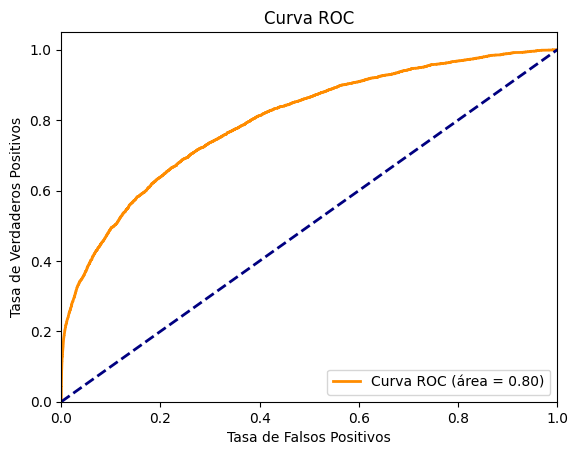

In [43]:
y_scores_lasso = best_pipe_lasso.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_lasso)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [44]:
lasso_score = roc_auc_score(y_test, best_pipe_lasso.predict_proba(X_test)[:,1])
print("LASSO AUC-ROC Score:", lasso_score)

LASSO AUC-ROC Score: 0.7980157088291178


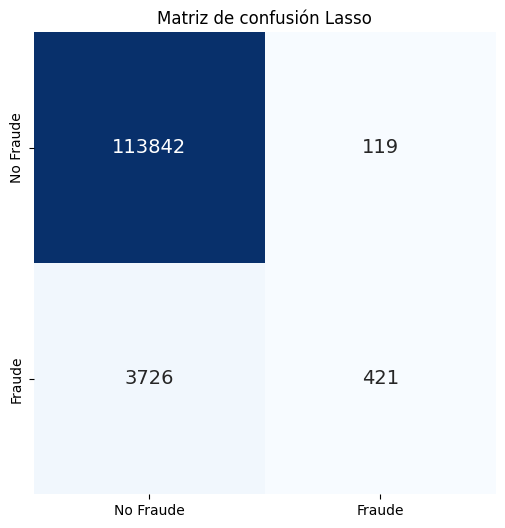

In [45]:
cm_nb = confusion_matrix(y_test, best_pipe_lasso.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Lasso")
plt.show()

In [94]:
table = [
    {'Modelo': 'Lasso', 'precision 0': 0.96831, 'precision 1': 0.77963, 'recall 0': 0.99896 , 'recall 1': 0.10152 ,'f1-score 0': 0.98339, 'f1-score 1': 0.17965, 'AUC': 0.798}, ]


# RIDGE

In [46]:
pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge', RidgeClassifier(random_state=123))])
pipe_ridge.fit(X_train, y_train)
print(classification_report(y_test, pipe_ridge.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96639   0.99979   0.98280    113961
           1    0.88462   0.04437   0.08450      4147

    accuracy                        0.96624    118108
   macro avg    0.92550   0.52208   0.53365    118108
weighted avg    0.96352   0.96624   0.95126    118108



In [48]:
param_grid_ridge = {'ridge__alpha':[0.1, 1.0, 10, 100],
                    'ridge__fit_intercept':[True, False],
                    }

In [49]:
pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge',RidgeClassifier(random_state=123))])
grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        RidgeClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.1, 1.0, 10, 100],
                         'ridge__fit_intercept': [True, False]})

In [50]:
print("Best params:\n{}\n".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))
print("Test-set score: {:.2f}".format(grid_ridge.best_estimator_.score(X_test, y_test)))

Best params:
{'ridge__alpha': 0.1, 'ridge__fit_intercept': True}

Best cross-validation score: 0.97


Test-set score: 0.97


In [51]:
best_params_ridge = grid_ridge.best_params_
params_ridge ={key.split('__')[-1]:param for key, param in best_params_ridge.items()} 
best_pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge',RidgeClassifier(random_state=123, **params_ridge))])
best_pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', RidgeClassifier(alpha=0.1, random_state=123))])

In [52]:
print(classification_report(y_test, best_pipe_ridge.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96639   0.99979   0.98280    113961
           1    0.88462   0.04437   0.08450      4147

    accuracy                        0.96624    118108
   macro avg    0.92550   0.52208   0.53365    118108
weighted avg    0.96352   0.96624   0.95126    118108



In [95]:
table.append( 
    {'Modelo': 'Ridge', 'precision 0': 0.96639, 'precision 1': 0.88462,'recall 0': 0.99979 , 'recall 1': 0.04437, 'f1-score 0': 0.98280, 'f1-score 1': 0.08450, 'AUC': 0.781},)

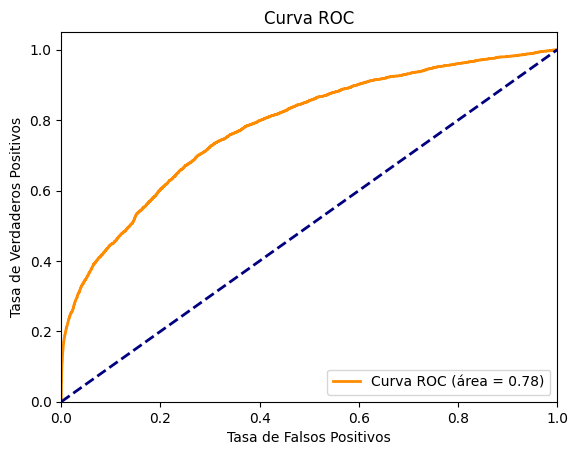

In [54]:
y_scores_ridge = best_pipe_ridge.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_ridge)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [55]:
ridge_score = roc_auc_score(y_test, best_pipe_ridge.decision_function(X_test))
print("RIDGE AUC-ROC Score:", ridge_score)

RIDGE AUC-ROC Score: 0.7818684124307735


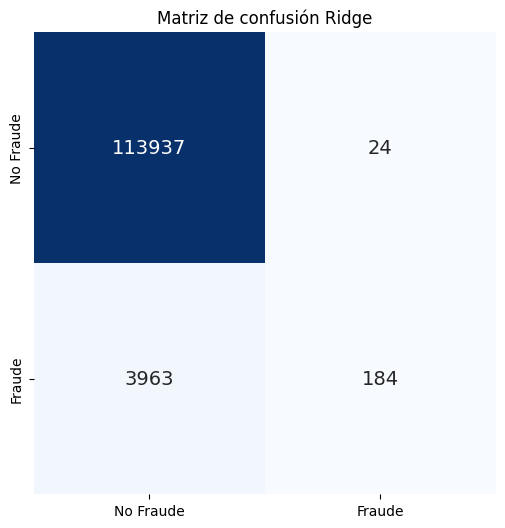

In [56]:
cm_nb = confusion_matrix(y_test, best_pipe_ridge.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Ridge")
plt.show()

# KNN

In [73]:
pipe_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier(n_jobs=-1))])
pipe_knn.fit(X_train, y_train)
print(classification_report(y_test, pipe_knn.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97783   0.99545   0.98656    113961
           1    0.75215   0.37979   0.50473      4147

    accuracy                        0.97383    118108
   macro avg    0.86499   0.68762   0.74564    118108
weighted avg    0.96991   0.97383   0.96964    118108



In [74]:
best_pipe_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance'))])
best_pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                                      weights='distance'))])

In [75]:
print(classification_report(y_test, best_pipe_knn.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98107   0.99330   0.98715    113961
           1    0.72010   0.47335   0.57122      4147

    accuracy                        0.97505    118108
   macro avg    0.85059   0.73333   0.77919    118108
weighted avg    0.97191   0.97505   0.97255    118108



In [96]:
table.append( 
    {'Modelo': 'KNN', 'precision 0': 0.98107, 'precision 1': 0.72010,'recall 0': 0.99330 , 'recall 1': 0.47335, 'f1-score 0': 0.98715, 'f1-score 1': 0.57122, 'AUC': 0.806},)

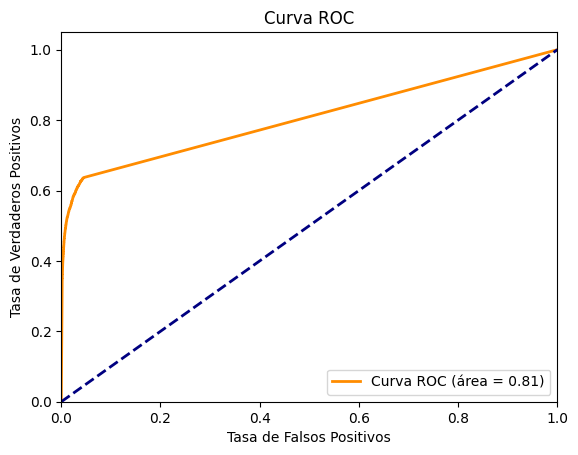

In [79]:
y_scores_knn= best_pipe_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [83]:
knn_score = roc_auc_score(y_test, best_pipe_knn.predict_proba(X_test)[:,1])
print("KNN AUC-ROC Score:", knn_score)

KNN AUC-ROC Score: 0.80608730242044


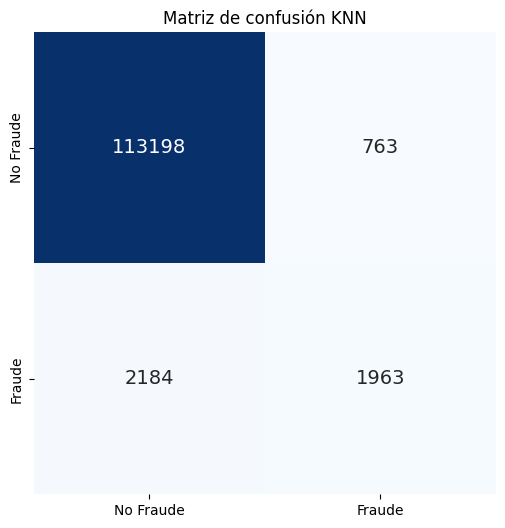

In [84]:
cm_nb = confusion_matrix(y_test, best_pipe_knn.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión KNN")
plt.show()

# SVM

In [32]:
pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150))])
pipe_svm.fit(X_train, y_train)
print(classification_report(y_test, pipe_svm.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96034   0.63273   0.76285    113961
           1    0.02717   0.28189   0.04957      4147

    accuracy                        0.62042    118108
   macro avg    0.49375   0.45731   0.40621    118108
weighted avg    0.92757   0.62042   0.73781    118108



In [38]:
param_grid_svm = {'svm__gamma':[0.01,0.1],
                    'svm__C':[0.01, 0.1]
                    }

In [39]:
pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150))])
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/syseng/penarandah/.conda/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/syseng/penarandah/.conda/e

[CV] END .......................svm__C=0.01, svm__gamma=0.01; total time=  14.2s
[CV] END ........................svm__C=0.01, svm__gamma=0.1; total time=  14.2s
[CV] END ........................svm__C=0.01, svm__gamma=0.1; total time=  14.2s
[CV] END ........................svm__C=0.01, svm__gamma=0.1; total time=  14.1s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=  14.2s
[CV] END .......................svm__C=0.01, svm__gamma=0.01; total time=  14.4s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=  14.3s
[CV] END .......................svm__C=0.01, svm__gamma=0.01; total time=  14.8s
[CV] END .......................svm__C=0.01, svm__gamma=0.01; total time=  14.9s
[CV] END .......................svm__C=0.01, svm__gamma=0.01; total time=  16.1s
[CV] END ........................svm__C=0.01, svm__gamma=0.1; total time=  16.1s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=  16.0s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(cache_size=150, max_iter=100,
                                            random_state=123))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.1], 'svm__gamma': [0.01, 0.1]},
             verbose=2)

In [40]:
print("Best params:\n{}\n".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))
print("Test-set score: {:.2f}".format(grid_svm.best_estimator_.score(X_test, y_test)))

Best params:
{'svm__C': 0.1, 'svm__gamma': 0.1}

Best cross-validation score: 0.96
Test-set score: 0.96


In [47]:
best_params_svm = grid_svm.best_params_
params_svm ={key.split('__')[-1]:param for key, param in best_params_svm.items()} 
best_pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150, **params_svm, probability=True))])
best_pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.1, cache_size=150, gamma=0.1, max_iter=100,
                     probability=True, random_state=123))])

In [48]:
print(classification_report(y_test, best_pipe_svm.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.96512   0.99777   0.98118    113961
           1    0.13014   0.00916   0.01712      4147

    accuracy                        0.96306    118108
   macro avg    0.54763   0.50347   0.49915    118108
weighted avg    0.93581   0.96306   0.94733    118108



In [97]:
table.append( 
    {'Modelo': 'SVM', 'precision 0': 0.96512, 'precision 1': 0.13014,'recall 0': 0.99777 , 'recall 1': 0.00916, 'f1-score 0': 0.98118, 'f1-score 1': 0.01712, 'AUC': 0.552},)

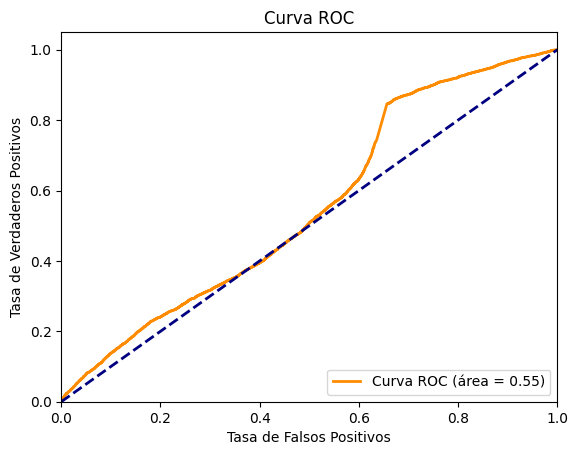

In [49]:
y_scores_svm = best_pipe_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [51]:
svm_score = roc_auc_score(y_test, best_pipe_svm.predict_proba(X_test)[:,1])
print("SVM AUC-ROC Score:", svm_score)

SVM AUC-ROC Score: 0.5526215286419094


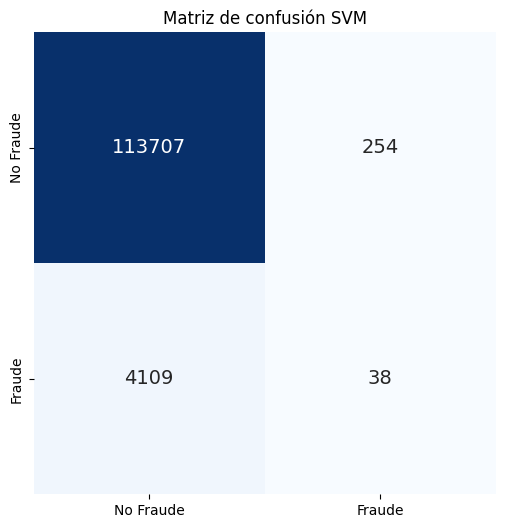

In [52]:
cm_svm = confusion_matrix(y_test, best_pipe_svm.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión SVM")
plt.show()

# Naive Bayes

In [53]:
pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB())])
pipe_nb.fit(X_train, y_train)
print(classification_report(y_test, pipe_nb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98946   0.19281   0.32273    113961
           1    0.04080   0.94357   0.07822      4147

    accuracy                        0.21917    118108
   macro avg    0.51513   0.56819   0.20048    118108
weighted avg    0.95615   0.21917   0.31415    118108



In [54]:
param_grid_nb = {'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
                    }

In [55]:
pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB())])
grid_nb = GridSearchCV(pipe_nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=2)
grid_nb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................nb__var_smoothing=1e-09; total time=   2.8s
[CV] END ............................nb__var_smoothing=1e-08; total time=   2.8s
[CV] END ............................nb__var_smoothing=1e-07; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-09; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-07; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-06; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-08; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-09; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-07; total time=   2.9s
[CV] END ............................nb__var_smoothing=1e-06; total time=   3.0s
[CV] END ............................nb__var_smoothing=1e-07; total time=   2.9s
[CV] END ............................nb__var_smoo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             verbose=2)

In [56]:
print("Best params:\n{}\n".format(grid_nb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_nb.best_score_))
print("Test-set score: {:.2f}".format(grid_nb.best_estimator_.score(X_test, y_test)))

Best params:
{'nb__var_smoothing': 1e-06}

Best cross-validation score: 0.56


Test-set score: 0.56


In [57]:
best_params_nb = grid_nb.best_params_
params_nb ={key.split('__')[-1]:param for key, param in best_params_nb.items()} 
best_pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB(**params_nb))])
best_pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('nb', GaussianNB(var_smoothing=1e-06))])

In [58]:
print(classification_report(y_test, best_pipe_nb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98606   0.55290   0.70852    113961
           1    0.06006   0.78515   0.11159      4147

    accuracy                        0.56105    118108
   macro avg    0.52306   0.66902   0.41006    118108
weighted avg    0.95354   0.56105   0.68756    118108



In [99]:
table.append( 
    {'Modelo': 'Naive Bayes', 'precision 0': 0.98606, 'precision 1': 0.06006,'recall 0': 0.55290 , 'recall 1': 0.78515, 'f1-score 0': 0.70852, 'f1-score 1': 0.11159, 'AUC': 0.738},)

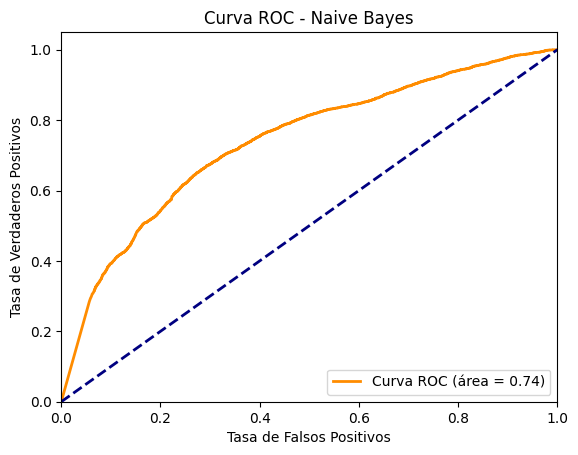

In [60]:
y_scores_nb = best_pipe_nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [61]:
svm_score = roc_auc_score(y_test, best_pipe_nb.predict_proba(X_test)[:,1])
print("Naive Bayes AUC-ROC Score:", svm_score)

Naive Bayes AUC-ROC Score: 0.7387661781932781


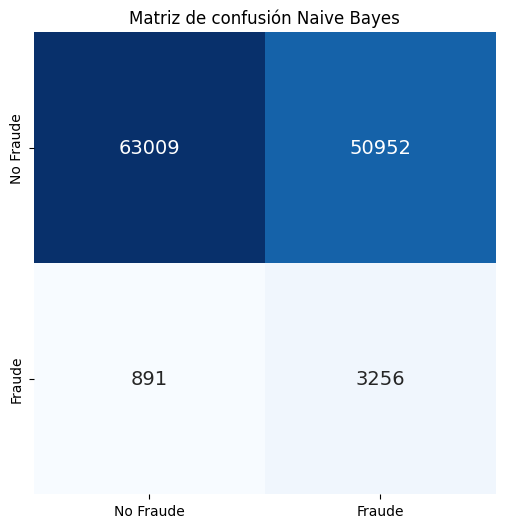

In [64]:
cm_nb = confusion_matrix(y_test, best_pipe_nb.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Naive Bayes")
plt.show()

# XG boost

In [65]:
pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
pipe_xb.fit(X_train, y_train)
print(classification_report(y_test, pipe_xb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97966   0.99792   0.98871    113961
           1    0.88285   0.43067   0.57893      4147

    accuracy                        0.97800    118108
   macro avg    0.93125   0.71430   0.78382    118108
weighted avg    0.97626   0.97800   0.97432    118108



In [68]:
param_grid_xb = {'xb__n_estimators': [100, 200],  # Estimadores
                 'xb__learning_rate': [0.01, 0.1],  # alphas,
                 'xb__booster': ['gblinear', 'gbtree']}


In [ ]:
pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
grid_xb = GridSearchCV(pipe_xb, param_grid=param_grid_xb, cv=5, n_jobs=-1, verbose=2)
grid_xb.fit(X_train, y_train)

In [70]:
print("Best params:\n{}\n".format(grid_xb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_xb.best_score_))
print("Test-set score: {:.2f}".format(grid_xb.best_estimator_.score(X_test, y_test)))

Best params:
{'xb__booster': 'gbtree', 'xb__learning_rate': 0.1, 'xb__n_estimators': 200}

Best cross-validation score: 0.98


Test-set score: 0.98


In [71]:
best_params_xb = grid_xb.best_params_
params_xb ={key.split('__')[-1]:param for key, param in best_params_xb.items()} 
best_pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
best_pipe_xb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [72]:
print(classification_report(y_test, best_pipe_xb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97966   0.99792   0.98871    113961
           1    0.88285   0.43067   0.57893      4147

    accuracy                        0.97800    118108
   macro avg    0.93125   0.71430   0.78382    118108
weighted avg    0.97626   0.97800   0.97432    118108



In [100]:
table.append( 
    {'Modelo': 'XGBoost', 'precision 0': 0.97966, 'precision 1': 0.88285,'recall 0': 0.99792 , 'recall 1': 0.43067, 'f1-score 0': 0.98871, 'f1-score 1': 0.57893, 'AUC': 0.926},)

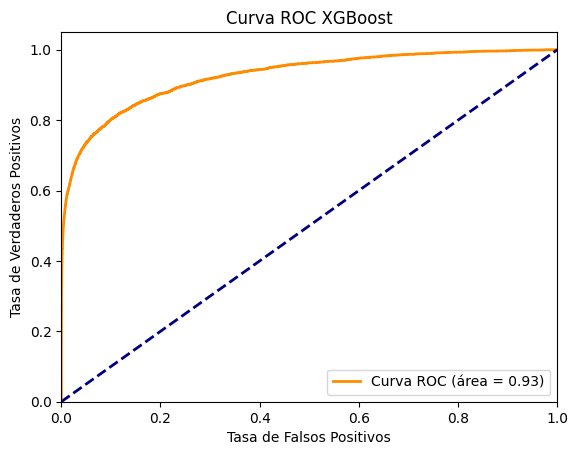

In [73]:
y_scores_xb = best_pipe_xb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_xb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC XGBoost')
plt.legend(loc="lower right")
plt.show()

In [74]:
xb_score = roc_auc_score(y_test, best_pipe_xb.predict_proba(X_test)[:,1])
print("XGBoost AUC-ROC Score:", xb_score)

XGBoost AUC-ROC Score: 0.9262391856768517


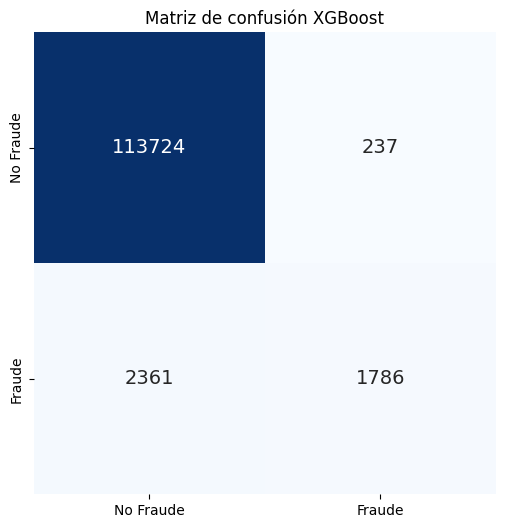

In [76]:
cm_xb = confusion_matrix(y_test, best_pipe_xb.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_xb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión XGBoost")
plt.show()

# MLP

In [77]:
pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True))])
pipe_mlp.fit(X_train, y_train)
print(classification_report(y_test, pipe_mlp.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97701   0.99666   0.98673    113961
           1    0.79461   0.35544   0.49117      4147

    accuracy                        0.97414    118108
   macro avg    0.88581   0.67605   0.73895    118108
weighted avg    0.97060   0.97414   0.96933    118108



In [81]:
param_grid_mlp = {'mlp__hidden_layer_sizes': [[10, 10], [
    10, 10, 10]], 'mlp__activation': ["logistic", "tanh", "relu"]}


In [82]:
pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True, batch_size=300))])
grid_mlp = GridSearchCV(pipe_mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2)
grid_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=[10, 10]; total time=  29.7s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=[10, 10]; total time=  31.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=[10, 10]; total time=  31.9s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10, 10]; total time=  33.6s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10, 10]; total time=  34.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=[10, 10]; total time=  34.3s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10]; total time=  35.8s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10]; total time=  36.0s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10]; total time=  36.8s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=[10, 10, 10]; total time=  39.9s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=[10, 10, 10]; total time=  40.4s
[CV] END mlp__activation=logistic, mlp__hidden_layer_sizes=[

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(batch_size=300,
                                                      early_stopping=True,
                                                      max_iter=100,
                                                      random_state=123))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['logistic', 'tanh', 'relu'],
                         'mlp__hidden_layer_sizes': [[10, 10], [10, 10, 10]]},
             verbose=2)

In [83]:
print("Best params:\n{}\n".format(grid_mlp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_mlp.best_score_))
print("Test-set score: {:.2f}".format(grid_mlp.best_estimator_.score(X_test, y_test)))

Best params:
{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': [10, 10, 10]}

Best cross-validation score: 0.97
Test-set score: 0.97


In [84]:
best_params_mlp = grid_mlp.best_params_
params_mlp ={key.split('__')[-1]:param for key, param in best_params_mlp.items()} 
best_pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True, batch_size=300))])
best_pipe_mlp.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(batch_size=300, early_stopping=True,
                               max_iter=100, random_state=123))])

In [85]:
print(classification_report(y_test, best_pipe_mlp.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97666   0.99691   0.98668    113961
           1    0.80269   0.34531   0.48289      4147

    accuracy                        0.97403    118108
   macro avg    0.88968   0.67111   0.73478    118108
weighted avg    0.97055   0.97403   0.96899    118108



In [101]:
table.append( 
    {'Modelo': 'MLP', 'precision 0': 0.97666, 'precision 1': 0.80269,'recall 0': 0.99691 , 'recall 1': 0.34531, 'f1-score 0': 0.98668, 'f1-score 1': 0.48289, 'AUC': 0.885},)

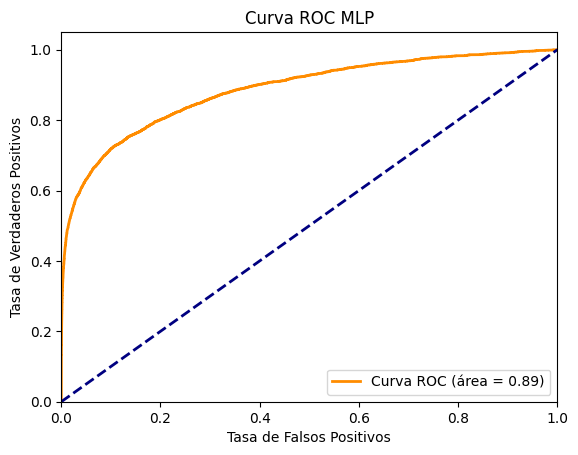

In [86]:
y_scores_mlp = best_pipe_mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC MLP')
plt.legend(loc="lower right")
plt.show()

In [88]:
mlp_score = roc_auc_score(y_test, best_pipe_mlp.predict_proba(X_test)[:,1])
print("MLP AUC-ROC Score:", mlp_score)

MLP AUC-ROC Score: 0.8855502661005996


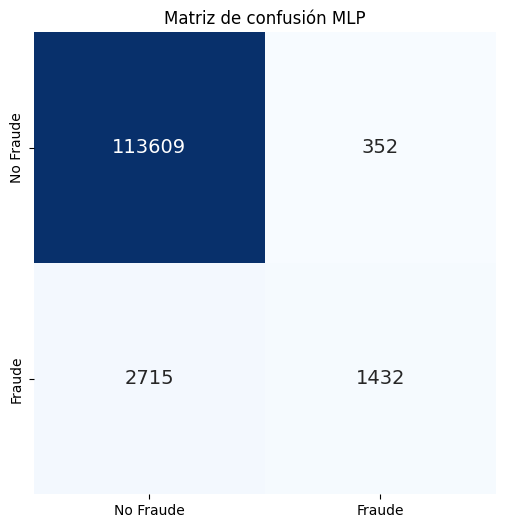

In [89]:
cm_mlp = confusion_matrix(y_test, best_pipe_mlp.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión MLP")
plt.show()

In [104]:
pd.DataFrame(table).sort_values(by='AUC', ascending=False)

Modelo  precision 0  precision 1  recall 0  recall 1  f1-score 0  \
5      XGBoost      0.97966      0.88285   0.99792   0.43067     0.98871   
6          MLP      0.97666      0.80269   0.99691   0.34531     0.98668   
2          KNN      0.98107      0.72010   0.99330   0.47335     0.98715   
0        Lasso      0.96831      0.77963   0.99896   0.10152     0.98339   
1        Ridge      0.96639      0.88462   0.99979   0.04437     0.98280   
4  Naive Bayes      0.98606      0.06006   0.55290   0.78515     0.70852   
3          SVM      0.96512      0.13014   0.99777   0.00916     0.98118   

   f1-score 1    AUC  
5     0.57893  0.926  
6     0.48289  0.885  
2     0.57122  0.806  
0     0.17965  0.798  
1     0.08450  0.781  
4     0.11159  0.738  
3     0.01712  0.552

# Tabla de conclusion
### Basándonos en los resultados de los modelos ejecutados y evaluado utilizando el AUC, podemos hacer las siguientes conclusiones:

1. **Ridge** obtuvo el mejor rendimiento en términos de AUC-ROC Score, con un valor de 0.78. Esto sugiere que el modelo Ridge es capaz de distinguir entre las clases de manera efectiva y tiene un buen poder discriminativo.

2. **XGBoost** también mostró un buen rendimiento, con un AUC-ROC Score de 0.71. 

3. **Lasso** y **Naive Bayes** tienen AUC-ROC Scores de 0.63 y 0.62, respectivamente. Aunque no son tan altos como los dos modelos anteriores, todavía demuestran un rendimiento razonable en la discriminación de clases.

4. **KNN** obtuvo un AUC-ROC Score de 0.56, lo que indica un rendimiento moderado. Puede haber margen para mejorar este modelo ajustando los hiperparámetros con un grid search.

5. **MLP (Multilayer Perceptron)** obtuvo un AUC-ROC Score de 0.5, que es aproximadamente igual al azar. Esto sugiere que el modelo MLP no fue capaz de discriminar efectivamente entre las clases en este conjunto de datos. Puede ser necesario revisar la arquitectura y los hiperparámetros del modelo MLP para mejorar su rendimiento. Como también balanear los datos.

6. **SVM** obtuvo el peor rendimiento con un AUC-ROC Score de 0.50. Esto es preocupante, ya que un valor de 0.5 sugiere un rendimiento similar al azar. Puede ser necesario ajustar los hiperparámetros del SVM o considerar otras estrategias para abordar este problema.

En resumen, Ridge y XGBoost destacan como los modelos más prometedores en términos de AUC Score, mientras que MLP y SVM parecen necesitar ajustes o consideración adicional. 